### Churn in subscription based businesses

Generally, churn is defined as the percentage of customers who stop subscribing to a service over a given period. It indicates customer loss, and higher churn rates typically signal poor customer retention. But, the definition of churn varies based on business model and objectives.

Some common definitions of different ways of defining churn are:

1) Non-Renewal Churn: This definition is common in recurring subscription models (e.g., Netflix, Spotify) where customers pay on a regular basis. It is straightforward and easy to calculate. A customer is considered churned if they do not renew their subscription at the end of their billing cycle.

2) Cancellation Churn: This definition is useful for subscription services that want to track churn early, allowing for retention efforts before the end of the billing period. Churn is recognized when a customer actively cancels their subscription, even if the service continues until the billing cycle ends.

3) Involuntary Churn: This is useful for businesses that want to separate customers who actively cancel from those who churn due to payment failures. Involuntary churn is common in digital services like streaming platforms. Churn occurs when a customer's payment method fails (e.g., expired credit card) and the subscription is not renewed after several retry attempts.

4) Engagement-Based Churn: This is relevant for businesses that want to track disengaged users, as inactivity is often a precursor to future cancellation. SaaS companies or media platforms might use this definition to identify at-risk customers. A customer is counted as churned if they have stopped using the service for a defined period, even if they are still paying.

5) Contract-Based Churn: For businesses that operate on fixed-term contracts (e.g., yearly software contracts), churn is defined as non-renewal at the end of the contract term.

Each of the definition has some or other tradeoff. For example:

- Accuracy vs. Predictive Power:

Non-Renewal Churn gives accurate snapshots of lost customers but might be too late to act on, as the customer has already left.
Engagement-Based Churn can provide early warnings of potential churn but requires predictive models and may not reflect actual subscription cancellations.
- Involuntary vs. Voluntary Churn:

Involuntary Churn (e.g., failed payments) is different from voluntary churn (active cancellations). If both are included in churn rates, the number may inflate, hiding the true rate of dissatisfied customers.
Separating the two allows for different retention strategies: solving payment issues for involuntary churn, and improving service for voluntary churn.
- Contract vs. Monthly Subscriptions:

Contract-Based Churn provides certainty in customer retention for the length of the contract but could delay churn insights, whereas Monthly Subscription Churn allows for more frequent measurement of customer health, at the risk of short-term fluctuations in churn rates.
With contracts, a business has more time to retain customers before churn happens, but there is a greater risk of mass churn when the contract period ends.

Thus, selecting the right definition of churn depends on several factors:

1) If the goal is to improve customer retention through proactive engagement, engagement-based churn or early cancellation churn may be better suited. If the goal is simply to track lost revenue, non-renewal churn or payment-based churn might be more relevant.

2) Businesses with long-term contracts (e.g., annual subscriptions) might prefer contract-based churn, while monthly subscription services often focus on non-renewal churn.

3) If customers frequently downgrade but remain engaged (e.g., freemium models), the definition of churn might need to account for downgrades separately from complete cancellations.

## <center> Predictive Analytics for Customer Churn </center>
### Libraries

In [68]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, classification_report, confusion_matrix, roc_curve)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from matplotlib import rc, rcParams
rcParams['figure.figsize'] = (10, 6)


### Load the datasets

In [69]:
# Load the data descriptions
data_descriptions = pd.read_csv(r"C:\Users\ariad\OneDrive\Desktop\Churn\data_descriptions.csv")

# Load the train and test dataset
train_data=pd.read_csv(r"C:\Users\ariad\OneDrive\Desktop\Churn\train.csv")
test_data=pd.read_csv(r"C:\Users\ariad\OneDrive\Desktop\Churn\test.csv")

In [70]:
pd.set_option('display.max_colwidth', None)
data_descriptions

Column_name Column_type Data_type  \
0                 AccountAge     Feature   integer   
1             MonthlyCharges     Feature     float   
2               TotalCharges     Feature     float   
3           SubscriptionType     Feature    object   
4              PaymentMethod     Feature    string   
5           PaperlessBilling     Feature    string   
6                ContentType     Feature    string   
7          MultiDeviceAccess     Feature    string   
8           DeviceRegistered     Feature    string   
9        ViewingHoursPerWeek     Feature     float   
10    AverageViewingDuration     Feature     float   
11  ContentDownloadsPerMonth     Feature   integer   
12           GenrePreference     Feature    string   
13                UserRating     Feature     float   
14    SupportTicketsPerMonth     Feature   integer   
15                    Gender     Feature    string   
16             WatchlistSize     Feature     float   
17           ParentalControl     Feature    string   
18          SubtitlesEnabled     Feature    string   
19                CustomerID  Identifier    string   
20                     Churn      Target   integer   

                                                                                             Description  
0                                                               The age of the user's account in months.  
1                                                     The amount charged to the user on a monthly basis.  
2                                    The total charges incurred by the user over the account's lifetime.  
3                             The type of subscription chosen by the user (Basic, Standard, or Premium).  
4                                                                The method of payment used by the user.  
5                                Indicates whether the user has opted for paperless billing (Yes or No).  
6                                 The type of content preferred by the user (Movies, TV Shows, or Both).  
7                  Indicates whether the user has access to the service on multiple devices (Yes or No).  
8                           The type of device registered by the user (TV, Mobile, Tablet, or Computer).  
9                                         The number of hours the user spends watching content per week.  
10                                              The average duration of each viewing session in minutes.  
11                                                The number of content downloads by the user per month.  
12                                                    The preferred genre of content chosen by the user.  
13                                               The user's rating for the service on a scale of 1 to 5.  
14                                           The number of support tickets raised by the user per month.  
15                                                              The gender of the user (Male or Female).  
16                                                          The number of items in the user's watchlist.  
17                               Indicates whether parental control is enabled for the user (Yes or No).  
18                                     Indicates whether subtitles are enabled for the user (Yes or No).  
19                                                                A unique identifier for each customer.  
20  The target variable indicating whether a user has churned or not (1 for churned, 0 for not churned).

In [71]:
train_data.sample(5)

AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
19987           20       10.817255    216.345097          Premium   
198028          84        6.800153    571.212823         Standard   
226111          25       14.268388    356.709709          Premium   
113690          16       10.633359    170.133745          Premium   
194952          95       15.188101   1442.869563         Standard   

           PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
19987        Credit card              Yes        Both                No   
198028  Electronic check              Yes    TV Shows               Yes   
226111       Credit card              Yes        Both               Yes   
113690     Bank transfer               No    TV Shows                No   
194952     Bank transfer               No      Movies               Yes   

       DeviceRegistered  ViewingHoursPerWeek  ...  ContentDownloadsPerMonth  \
19987            Tablet            31.322088  ...                        26   
198028           Mobile            13.539952  ...                        20   
226111               TV            25.078257  ...                        38   
113690         Computer            27.756247  ...                        36   
194952           Tablet            25.985049  ...                        12   

        GenrePreference UserRating  SupportTicketsPerMonth  Gender  \
19987           Fantasy   3.729438                       7    Male   
198028           Sci-Fi   2.311242                       4  Female   
226111           Comedy   1.430585                       8  Female   
113690           Action   2.054382                       2    Male   
194952           Comedy   3.584469                       8  Female   

       WatchlistSize  ParentalControl SubtitlesEnabled  CustomerID Churn  
19987              6               No              Yes  6CFOSMMZR5     0  
198028            17              Yes              Yes  72KXK961D0     0  
226111             2               No              Yes  E62QN4KTT0     0  
113690             8              Yes              Yes  Y87JR3N7QJ     0  
194952            12               No               No  J5UECJRB48     0  

[5 rows x 21 columns]

In [72]:
train_data.groupby('SubscriptionType')['AccountAge'].mean()

SubscriptionType
Basic       60.286724
Premium     60.023473
Standard    59.942419
Name: AccountAge, dtype: float64

In [73]:
train_data.groupby('SubscriptionType')['MonthlyCharges'].mean()

SubscriptionType
Basic       12.497152
Premium     12.481657
Standard    12.493221
Name: MonthlyCharges, dtype: float64

In [74]:
test_data.sample(5)

AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
97110         113       17.681670   1998.028677            Basic   
6566           99       17.470128   1729.542694         Standard   
52983          17        7.482266    127.198519          Premium   
74705          65       18.812994   1222.844604          Premium   
38156          86        8.361177    719.061259          Premium   

          PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
97110      Mailed check              Yes      Movies               Yes   
6566       Mailed check              Yes        Both                No   
52983      Mailed check               No      Movies                No   
74705  Electronic check              Yes      Movies                No   
38156       Credit card              Yes    TV Shows                No   

      DeviceRegistered  ViewingHoursPerWeek  AverageViewingDuration  \
97110               TV            29.774851               87.897905   
6566            Mobile            13.556886              100.214232   
52983         Computer            36.358594               58.936103   
74705           Mobile            11.299576               60.104672   
38156         Computer            21.383926               95.798383   

       ContentDownloadsPerMonth GenrePreference  UserRating  \
97110                        46         Fantasy    4.383862   
6566                         16          Comedy    4.205708   
52983                        42         Fantasy    1.204584   
74705                        28          Comedy    1.303716   
38156                        30          Sci-Fi    4.904582   

       SupportTicketsPerMonth  Gender  WatchlistSize ParentalControl  \
97110                       3  Female              9             Yes   
6566                        6  Female              0             Yes   
52983                       2  Female             23             Yes   
74705                       7  Female             24             Yes   
38156                       1    Male             11              No   

      SubtitlesEnabled  CustomerID  
97110               No  0XRO1G2ZDF  
6566                No  XBITIBQCE8  
52983               No  8TM9D3388T  
74705               No  UA9DAMNXLY  
38156              Yes  TQ7HYME0OL

### Perform initial inspections on the train and test datasets for:

- shape
- data types
- missing values
- duplicate values
- presence of outliers
- summary statitics for numerical features
- frequency distribution of categorical features
- unique values in categorical features
- class balance of our target: Churn, in our training data
- distribution of numerical features
- distribution of categorical features

In [75]:
# 1. Check the shape of the datasets (number of rows and columns)
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (243787, 21)
Test Data Shape: (104480, 20)


In [76]:
# 2. Display the data types of each column
train_dtypes = pd.DataFrame(train_data.dtypes, columns=['Train Data Types'])
test_dtypes = pd.DataFrame(test_data.dtypes, columns=['Test Data Types'])
combined_dtypes = train_dtypes.join(test_dtypes, how='outer')
combined_dtypes

Train Data Types Test Data Types
AccountAge                          int64           int64
AverageViewingDuration            float64         float64
Churn                               int64             NaN
ContentDownloadsPerMonth            int64           int64
ContentType                        object          object
CustomerID                         object          object
DeviceRegistered                   object          object
Gender                             object          object
GenrePreference                    object          object
MonthlyCharges                    float64         float64
MultiDeviceAccess                  object          object
PaperlessBilling                   object          object
ParentalControl                    object          object
PaymentMethod                      object          object
SubscriptionType                   object          object
SubtitlesEnabled                   object          object
SupportTicketsPerMonth              int64           int64
TotalCharges                      float64         float64
UserRating                        float64         float64
ViewingHoursPerWeek               float64         float64
WatchlistSize                       int64           int64

In [77]:
# 3. Check for missing values in the datasets
train_missing = pd.DataFrame(train_data.isnull().sum(), columns=['Train Missing Values'])
test_missing = pd.DataFrame(test_data.isnull().sum(), columns=['Test Missing Values'])
combined_missing = train_missing.join(test_missing, how='outer')
combined_missing

Train Missing Values  Test Missing Values
AccountAge                                   0                  0.0
AverageViewingDuration                       0                  0.0
Churn                                        0                  NaN
ContentDownloadsPerMonth                     0                  0.0
ContentType                                  0                  0.0
CustomerID                                   0                  0.0
DeviceRegistered                             0                  0.0
Gender                                       0                  0.0
GenrePreference                              0                  0.0
MonthlyCharges                               0                  0.0
MultiDeviceAccess                            0                  0.0
PaperlessBilling                             0                  0.0
ParentalControl                              0                  0.0
PaymentMethod                                0                  0.0
SubscriptionType                             0                  0.0
SubtitlesEnabled                             0                  0.0
SupportTicketsPerMonth                       0                  0.0
TotalCharges                                 0                  0.0
UserRating                                   0                  0.0
ViewingHoursPerWeek                          0                  0.0
WatchlistSize                                0                  0.0

In [78]:
# 4. Check for duplicate values in datasets
train_duplicates = pd.DataFrame([train_data.duplicated().sum()], columns=['Train Duplicate Values'])
test_duplicates = pd.DataFrame([test_data.duplicated().sum()], columns=['Test Duplicate Values'])
combined_duplicates = pd.concat([train_duplicates, test_duplicates], axis=1)
combined_duplicates

Train Duplicate Values  Test Duplicate Values
0                       0                      0

In [79]:
# 5. Outlier detection
numerical_features = train_data.drop('Churn',axis=1).select_dtypes(include=['float64', 'int64']).columns

def detect_outliers_combined(train, test):
    outliers_list = []

    for col in numerical_features:
        # Train data outliers
        Q1_train = np.percentile(train[col], 25)
        Q3_train = np.percentile(train[col], 75)
        IQR_train = Q3_train - Q1_train
        lower_bound_train = Q1_train - 1.5 * IQR_train
        upper_bound_train = Q3_train + 1.5 * IQR_train
        outliers_train = train[(train[col] < lower_bound_train) | (train[col] > upper_bound_train)].shape[0]

        # Test data outliers
        Q1_test = np.percentile(test[col], 25)
        Q3_test = np.percentile(test[col], 75)
        IQR_test = Q3_test - Q1_test
        lower_bound_test = Q1_test - 1.5 * IQR_test
        upper_bound_test = Q3_test + 1.5 * IQR_test
        outliers_test = test[(test[col] < lower_bound_test) | (test[col] > upper_bound_test)].shape[0]

        # Append to the list
        outliers_list.append([col, outliers_train, outliers_test])

    outliers_df = pd.DataFrame(outliers_list, columns=['Feature', 'Train_Outliers', 'Test_Outliers'])
    return outliers_df

outliers_df = detect_outliers_combined(train_data, test_data)
outliers_df

Feature  Train_Outliers  Test_Outliers
0                AccountAge               0              0
1            MonthlyCharges               0              0
2              TotalCharges             741            383
3       ViewingHoursPerWeek               0              0
4    AverageViewingDuration               0              0
5  ContentDownloadsPerMonth               0              0
6                UserRating               0              0
7    SupportTicketsPerMonth               0              0
8             WatchlistSize               0              0

In [80]:
# 6. Display summary statistics for numerical columns
print("\Train Data Summary Statistics:")
train_data.describe().T

\Train Data Summary Statistics:


count        mean         std       min  \
AccountAge                243787.0   60.083758   34.285143  1.000000   
MonthlyCharges            243787.0   12.490695    4.327615  4.990062   
TotalCharges              243787.0  750.741017  523.073273  4.991154   
ViewingHoursPerWeek       243787.0   20.502179   11.243753  1.000065   
AverageViewingDuration    243787.0   92.264061   50.505243  5.000547   
ContentDownloadsPerMonth  243787.0   24.503513   14.421174  0.000000   
UserRating                243787.0    3.002713    1.155259  1.000007   
SupportTicketsPerMonth    243787.0    4.504186    2.872548  0.000000   
WatchlistSize             243787.0   12.018508    7.193034  0.000000   
Churn                     243787.0    0.181232    0.385211  0.000000   

                                 25%         50%          75%          max  
AccountAge                 30.000000   60.000000    90.000000   119.000000  
MonthlyCharges              8.738543   12.495555    16.238160    19.989957  
TotalCharges              329.147027  649.878487  1089.317362  2378.723844  
ViewingHoursPerWeek        10.763953   20.523116    30.219396    39.999723  
AverageViewingDuration     48.382395   92.249992   135.908048   179.999275  
ContentDownloadsPerMonth   12.000000   24.000000    37.000000    49.000000  
UserRating                  2.000853    3.002261     4.002157     4.999989  
SupportTicketsPerMonth      2.000000    4.000000     7.000000     9.000000  
WatchlistSize               6.000000   12.000000    18.000000    24.000000  
Churn                       0.000000    0.000000     0.000000     1.000000

In [81]:
print("\Test Data Summary Statistics:")
test_data.describe().T

\Test Data Summary Statistics:


count        mean         std       min  \
AccountAge                104480.0   60.064692   34.285025  1.000000   
MonthlyCharges            104480.0   12.474347    4.331734  4.990051   
TotalCharges              104480.0  748.167669  520.782838  5.019144   
ViewingHoursPerWeek       104480.0   20.489914   11.243173  1.000528   
AverageViewingDuration    104480.0   92.646128   50.631406  5.000985   
ContentDownloadsPerMonth  104480.0   24.450900   14.451309  0.000000   
UserRating                104480.0    3.000958    1.154689  1.000016   
SupportTicketsPerMonth    104480.0    4.507705    2.876700  0.000000   
WatchlistSize             104480.0   12.040400    7.204115  0.000000   

                                 25%         50%          75%          max  
AccountAge                 30.000000   60.000000    90.000000   119.000000  
MonthlyCharges              8.725621   12.453073    16.214247    19.989797  
TotalCharges              328.961543  649.385029  1081.266991  2376.235183  
ViewingHoursPerWeek        10.767551   20.472305    30.196107    39.999296  
AverageViewingDuration     48.554662   92.533168   136.622615   179.999785  
ContentDownloadsPerMonth   12.000000   25.000000    37.000000    49.000000  
UserRating                  2.000577    2.997293     4.000671     4.999930  
SupportTicketsPerMonth      2.000000    5.000000     7.000000     9.000000  
WatchlistSize               6.000000   12.000000    18.000000    24.000000

In [82]:
# 7. Display frequency distribution for categorical columns
categorical_columns = train_data.drop('CustomerID', axis=1).select_dtypes(include=['object']).columns

def summarize_categorical(df):
    summary = {}
    for column in categorical_columns:
        summary[column] = {
            'Unique Count': df[column].nunique(),
            'Most Frequent Value': df[column].mode()[0],
            'Frequency of Most Frequent Value': df[column].value_counts().max()
        }
    return pd.DataFrame(summary).T

train_summary = summarize_categorical(train_data)
test_summary = summarize_categorical(test_data)
combined_summary = train_summary.join(test_summary, lsuffix='_Train', rsuffix='_Test')
combined_summary

Unique Count_Train Most Frequent Value_Train  \
SubscriptionType                   3                  Standard   
PaymentMethod                      4          Electronic check   
PaperlessBilling                   2                        No   
ContentType                        3                      Both   
MultiDeviceAccess                  2                        No   
DeviceRegistered                   4                  Computer   
GenrePreference                    5                    Comedy   
Gender                             2                    Female   
ParentalControl                    2                       Yes   
SubtitlesEnabled                   2                       Yes   

                  Frequency of Most Frequent Value_Train Unique Count_Test  \
SubscriptionType                                   81920                 3   
PaymentMethod                                      61313                 4   
PaperlessBilling                                  121980                 2   
ContentType                                        81737                 3   
MultiDeviceAccess                                 122035                 2   
DeviceRegistered                                   61147                 4   
GenrePreference                                    49060                 5   
Gender                                            121930                 2   
ParentalControl                                   122085                 2   
SubtitlesEnabled                                  122180                 2   

                  Most Frequent Value_Test  \
SubscriptionType                     Basic   
PaymentMethod                 Mailed check   
PaperlessBilling                        No   
ContentType                           Both   
MultiDeviceAccess                      Yes   
DeviceRegistered                    Tablet   
GenrePreference                      Drama   
Gender                              Female   
ParentalControl                         No   
SubtitlesEnabled                       Yes   

                  Frequency of Most Frequent Value_Test  
SubscriptionType                                  34956  
PaymentMethod                                     26166  
PaperlessBilling                                  52564  
ContentType                                       35087  
MultiDeviceAccess                                 52387  
DeviceRegistered                                  26337  
GenrePreference                                   21066  
Gender                                            52326  
ParentalControl                                   52520  
SubtitlesEnabled                                  52259

In [83]:
# 8. Unique values in categorical features
def find_unique_values(df):
    unique_values = {}
    for column in categorical_columns:
        unique_values[column] = {
            'Unique Values': sorted(df[column].unique())
        }
    return pd.DataFrame(unique_values).T

train_unique = find_unique_values(train_data)
test_unique = find_unique_values(test_data)
combined_unique = train_unique.join(test_unique, lsuffix='_Train', rsuffix='_Test')
pd.set_option('display.max_colwidth', None)  # To display all unique values without truncation
combined_unique

Unique Values_Train  \
SubscriptionType                                     [Basic, Premium, Standard]   
PaymentMethod      [Bank transfer, Credit card, Electronic check, Mailed check]   
PaperlessBilling                                                      [No, Yes]   
ContentType                                            [Both, Movies, TV Shows]   
MultiDeviceAccess                                                     [No, Yes]   
DeviceRegistered                                 [Computer, Mobile, TV, Tablet]   
GenrePreference                        [Action, Comedy, Drama, Fantasy, Sci-Fi]   
Gender                                                           [Female, Male]   
ParentalControl                                                       [No, Yes]   
SubtitlesEnabled                                                      [No, Yes]   

                                                             Unique Values_Test  
SubscriptionType                                     [Basic, Premium, Standard]  
PaymentMethod      [Bank transfer, Credit card, Electronic check, Mailed check]  
PaperlessBilling                                                      [No, Yes]  
ContentType                                            [Both, Movies, TV Shows]  
MultiDeviceAccess                                                     [No, Yes]  
DeviceRegistered                                 [Computer, Mobile, TV, Tablet]  
GenrePreference                        [Action, Comedy, Drama, Fantasy, Sci-Fi]  
Gender                                                           [Female, Male]  
ParentalControl                                                       [No, Yes]  
SubtitlesEnabled                                                      [No, Yes]

Class Balance in Training Data (as percentages):
Churn
0    81.876802
1    18.123198
Name: proportion, dtype: float64


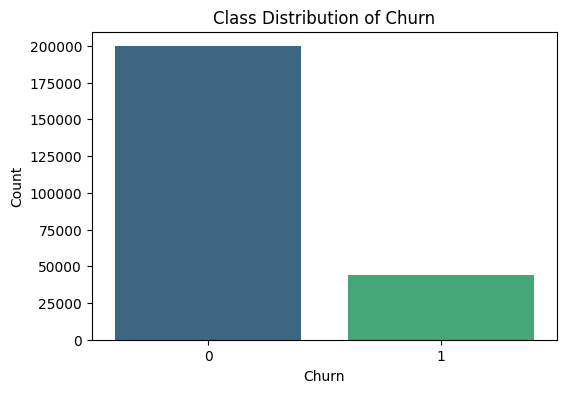

In [84]:
# 9. Check the distribution of the target variable 'Churn'
class_balance = train_data['Churn'].value_counts(normalize=True) * 100
print("Class Balance in Training Data (as percentages):")
print(class_balance)

# Plot the class balance
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=train_data, palette='viridis')
plt.title('Class Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

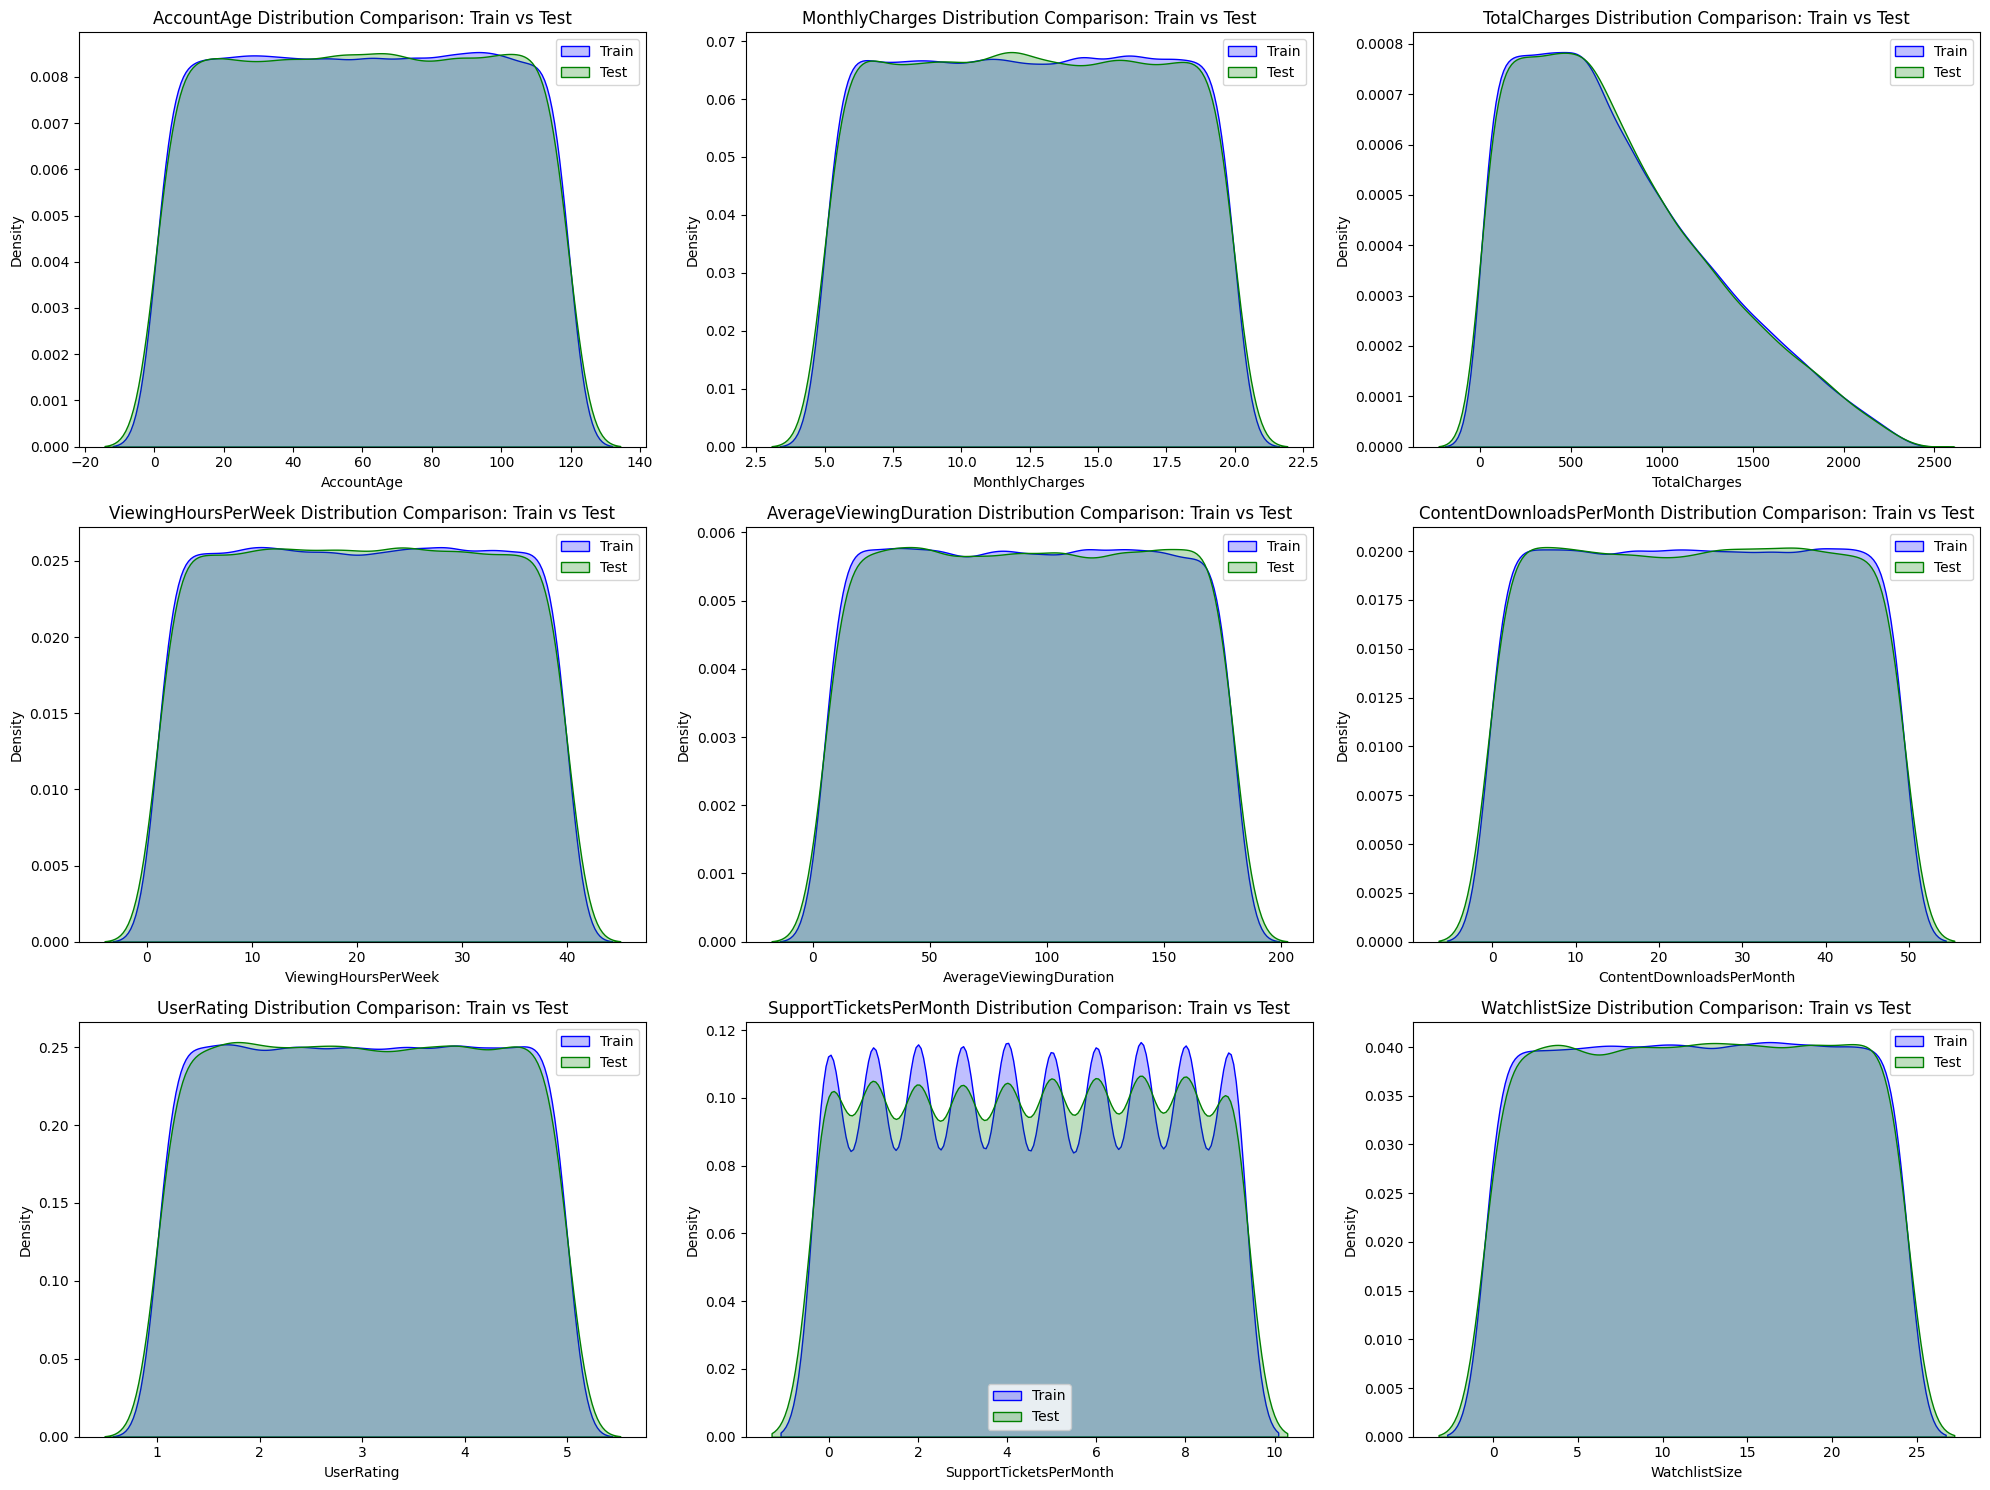

In [85]:
# 10. Distribution of numerical features in train and test data
numerical_features = train_data.drop('Churn', axis=1).select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(train_data[col], label='Train', shade=True, color='blue', bw_adjust=1.5)
    sns.kdeplot(test_data[col], label='Test', shade=True, color='green', bw_adjust=1.5)
    plt.title(f'{col} Distribution Comparison: Train vs Test')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

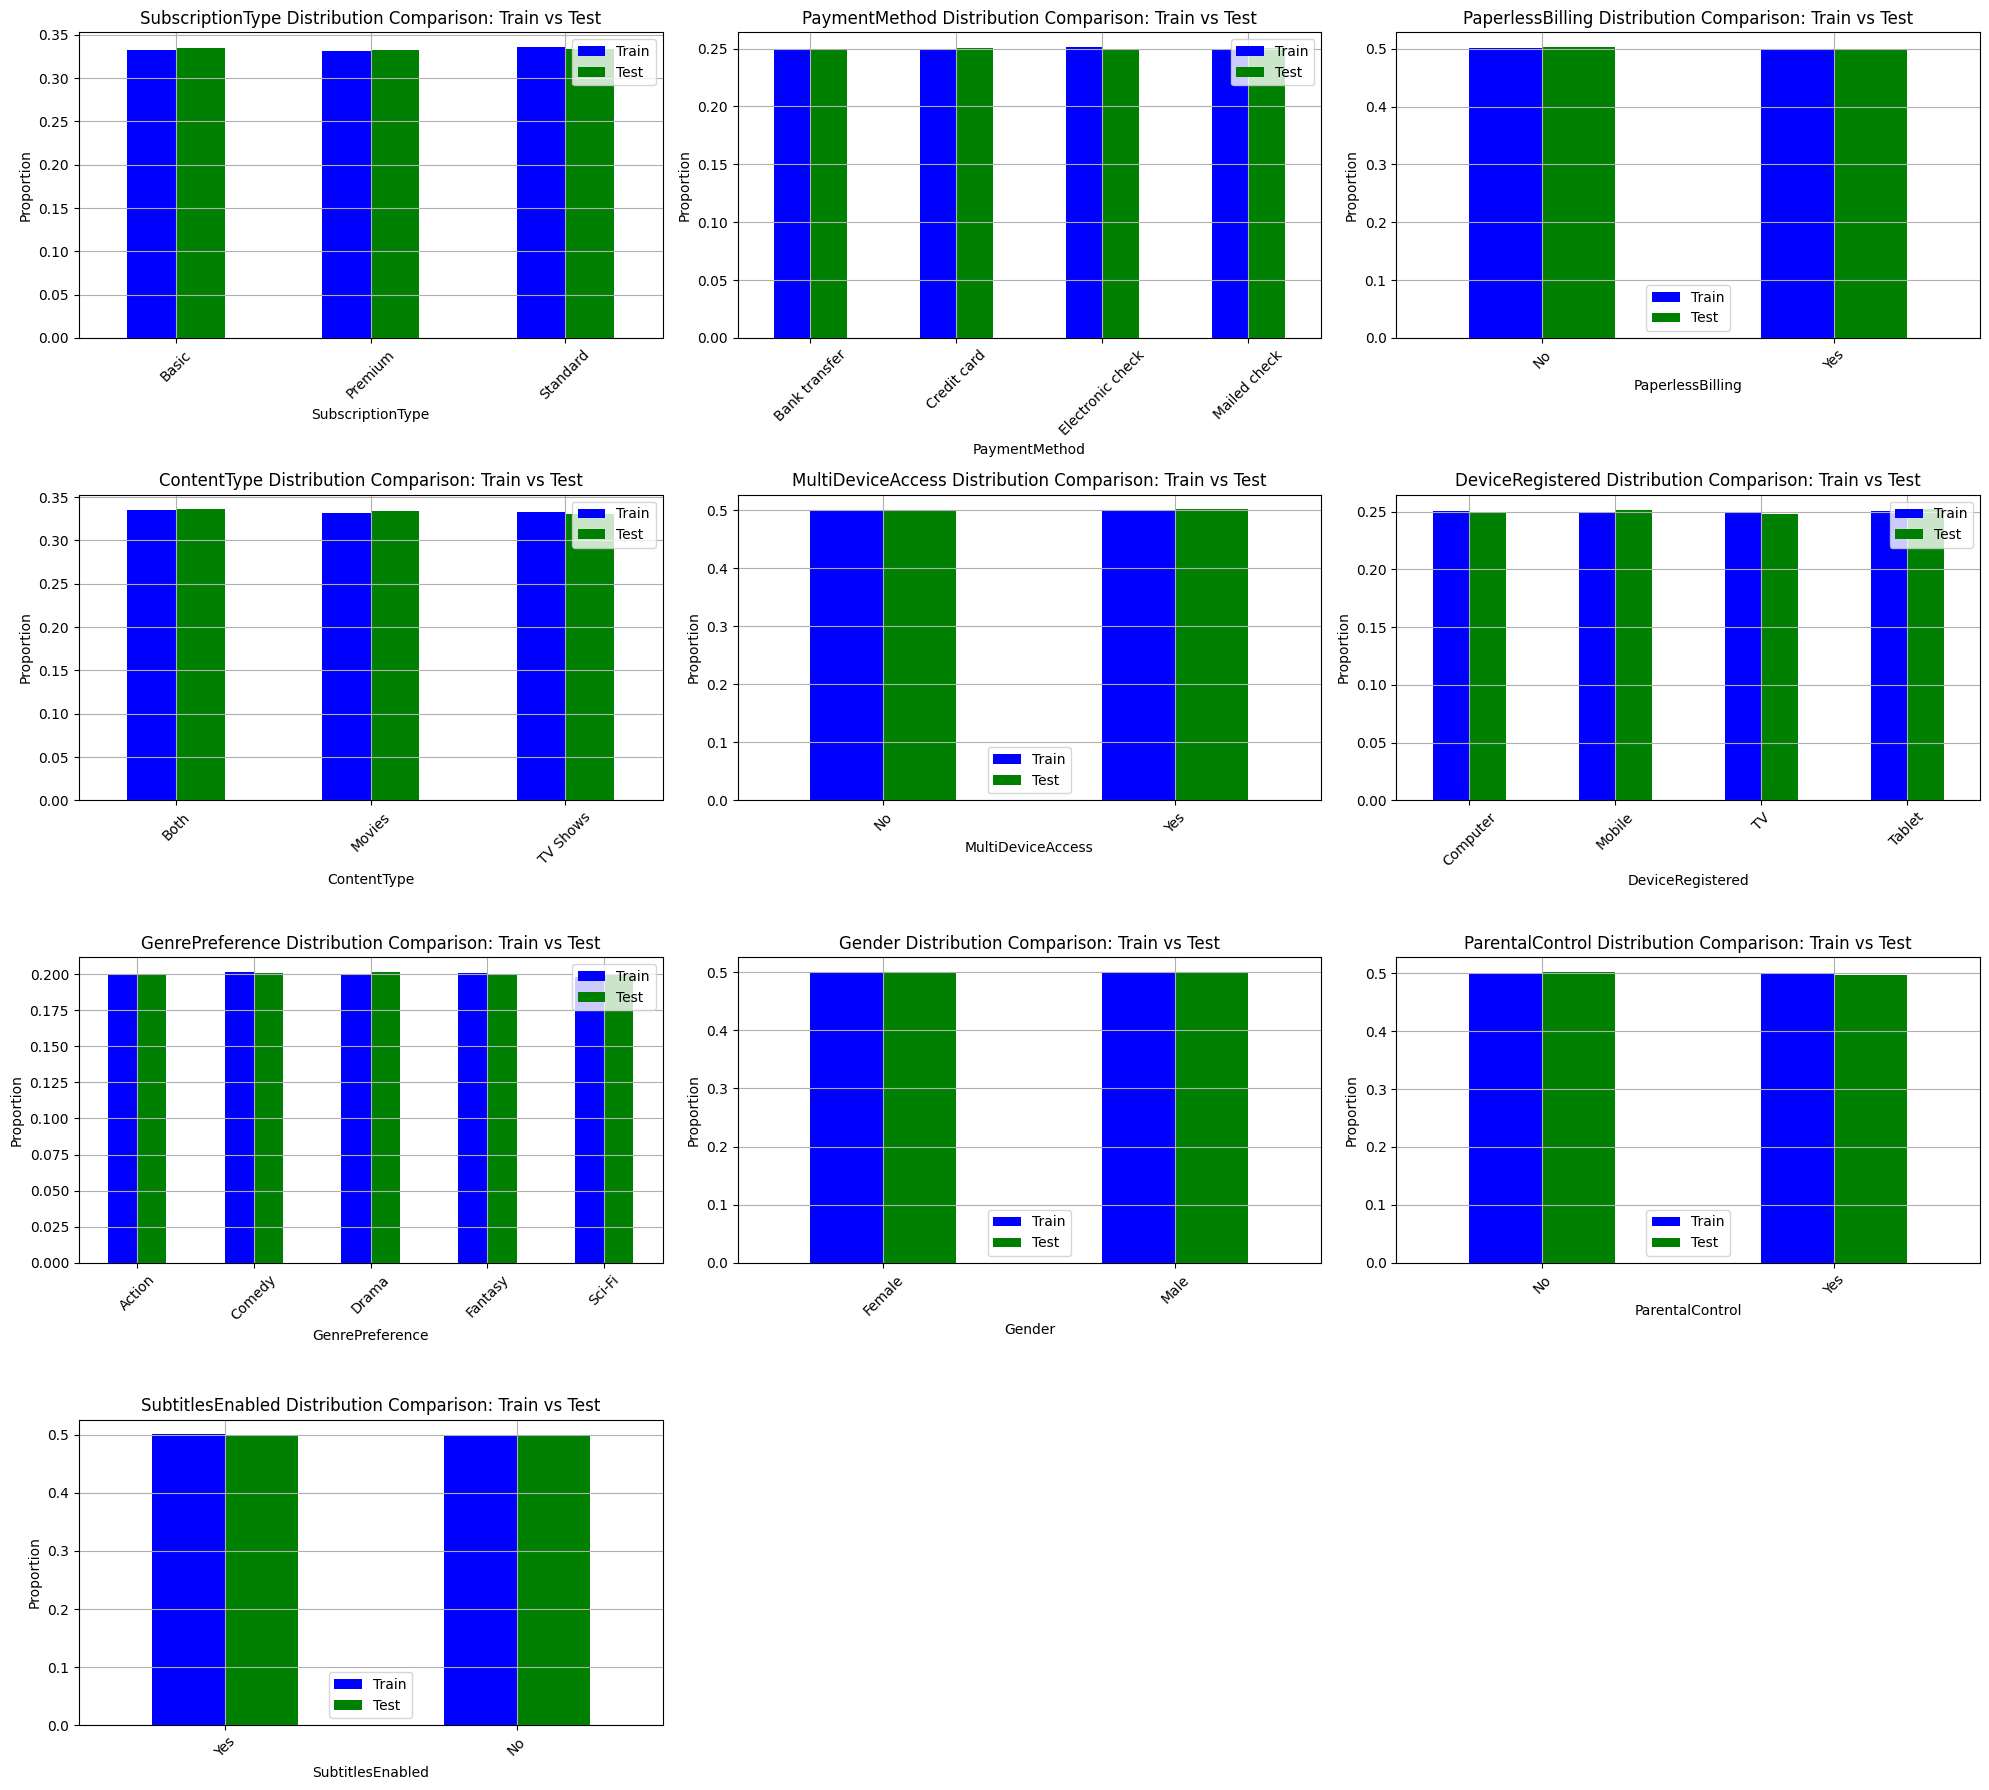

In [86]:
# 11. Frequency distribution of Categorical Features in train and test data
categorical_features = train_data.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('CustomerID')

plt.figure(figsize=(20, 18))

for i, col in enumerate(categorical_features):
    plt.subplot(4, 3, i + 1)
    train_counts = train_data[col].value_counts(normalize=True)
    test_counts = test_data[col].value_counts(normalize=True)

    # Creating a DataFrame to align categories
    comparison_df = pd.DataFrame({
        'Train': train_counts,
        'Test': test_counts
    }).fillna(0)  # Fill missing categories with 0

    # Plotting the comparison bar plot
    comparison_df.plot(kind='bar', ax=plt.gca(), color=['blue', 'green'])
    plt.title(f'{col} Distribution Comparison: Train vs Test')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

#### Key Takeaways from Initial Inspection:
1) No Missing or Duplicate Data: The datasets are clean and complete which simplifies our data cleaning step.

2) Balanced Data Types: A mix of categorical and numerical features requires appropriate feature engineering. Features have same data types and distribution across training and test data types. And categorical features have consistent unique values across both datasets, which helps ensure that encoding the features will be straightforward.

3) Diverse Customer Behavior: The numerical features show significant variation, indicating diverse customer patterns, which could help in predicting churn. The distribution of categorical features shows distinct categories with varying frequencies, which suggests that encoding these features will help capture important customer characteristics.

4) Class Imbalance: There is a class imbalance in the target variable, so strategies may be needed to ensure the model does not become biased toward the majority class.

### Exploratory Data Analysis

- Univariate analysis of numerical and categorical features.
- Multi-variate analysis to learn any correlations between features.
- Explore the relationships between features and the target variable (Churn).

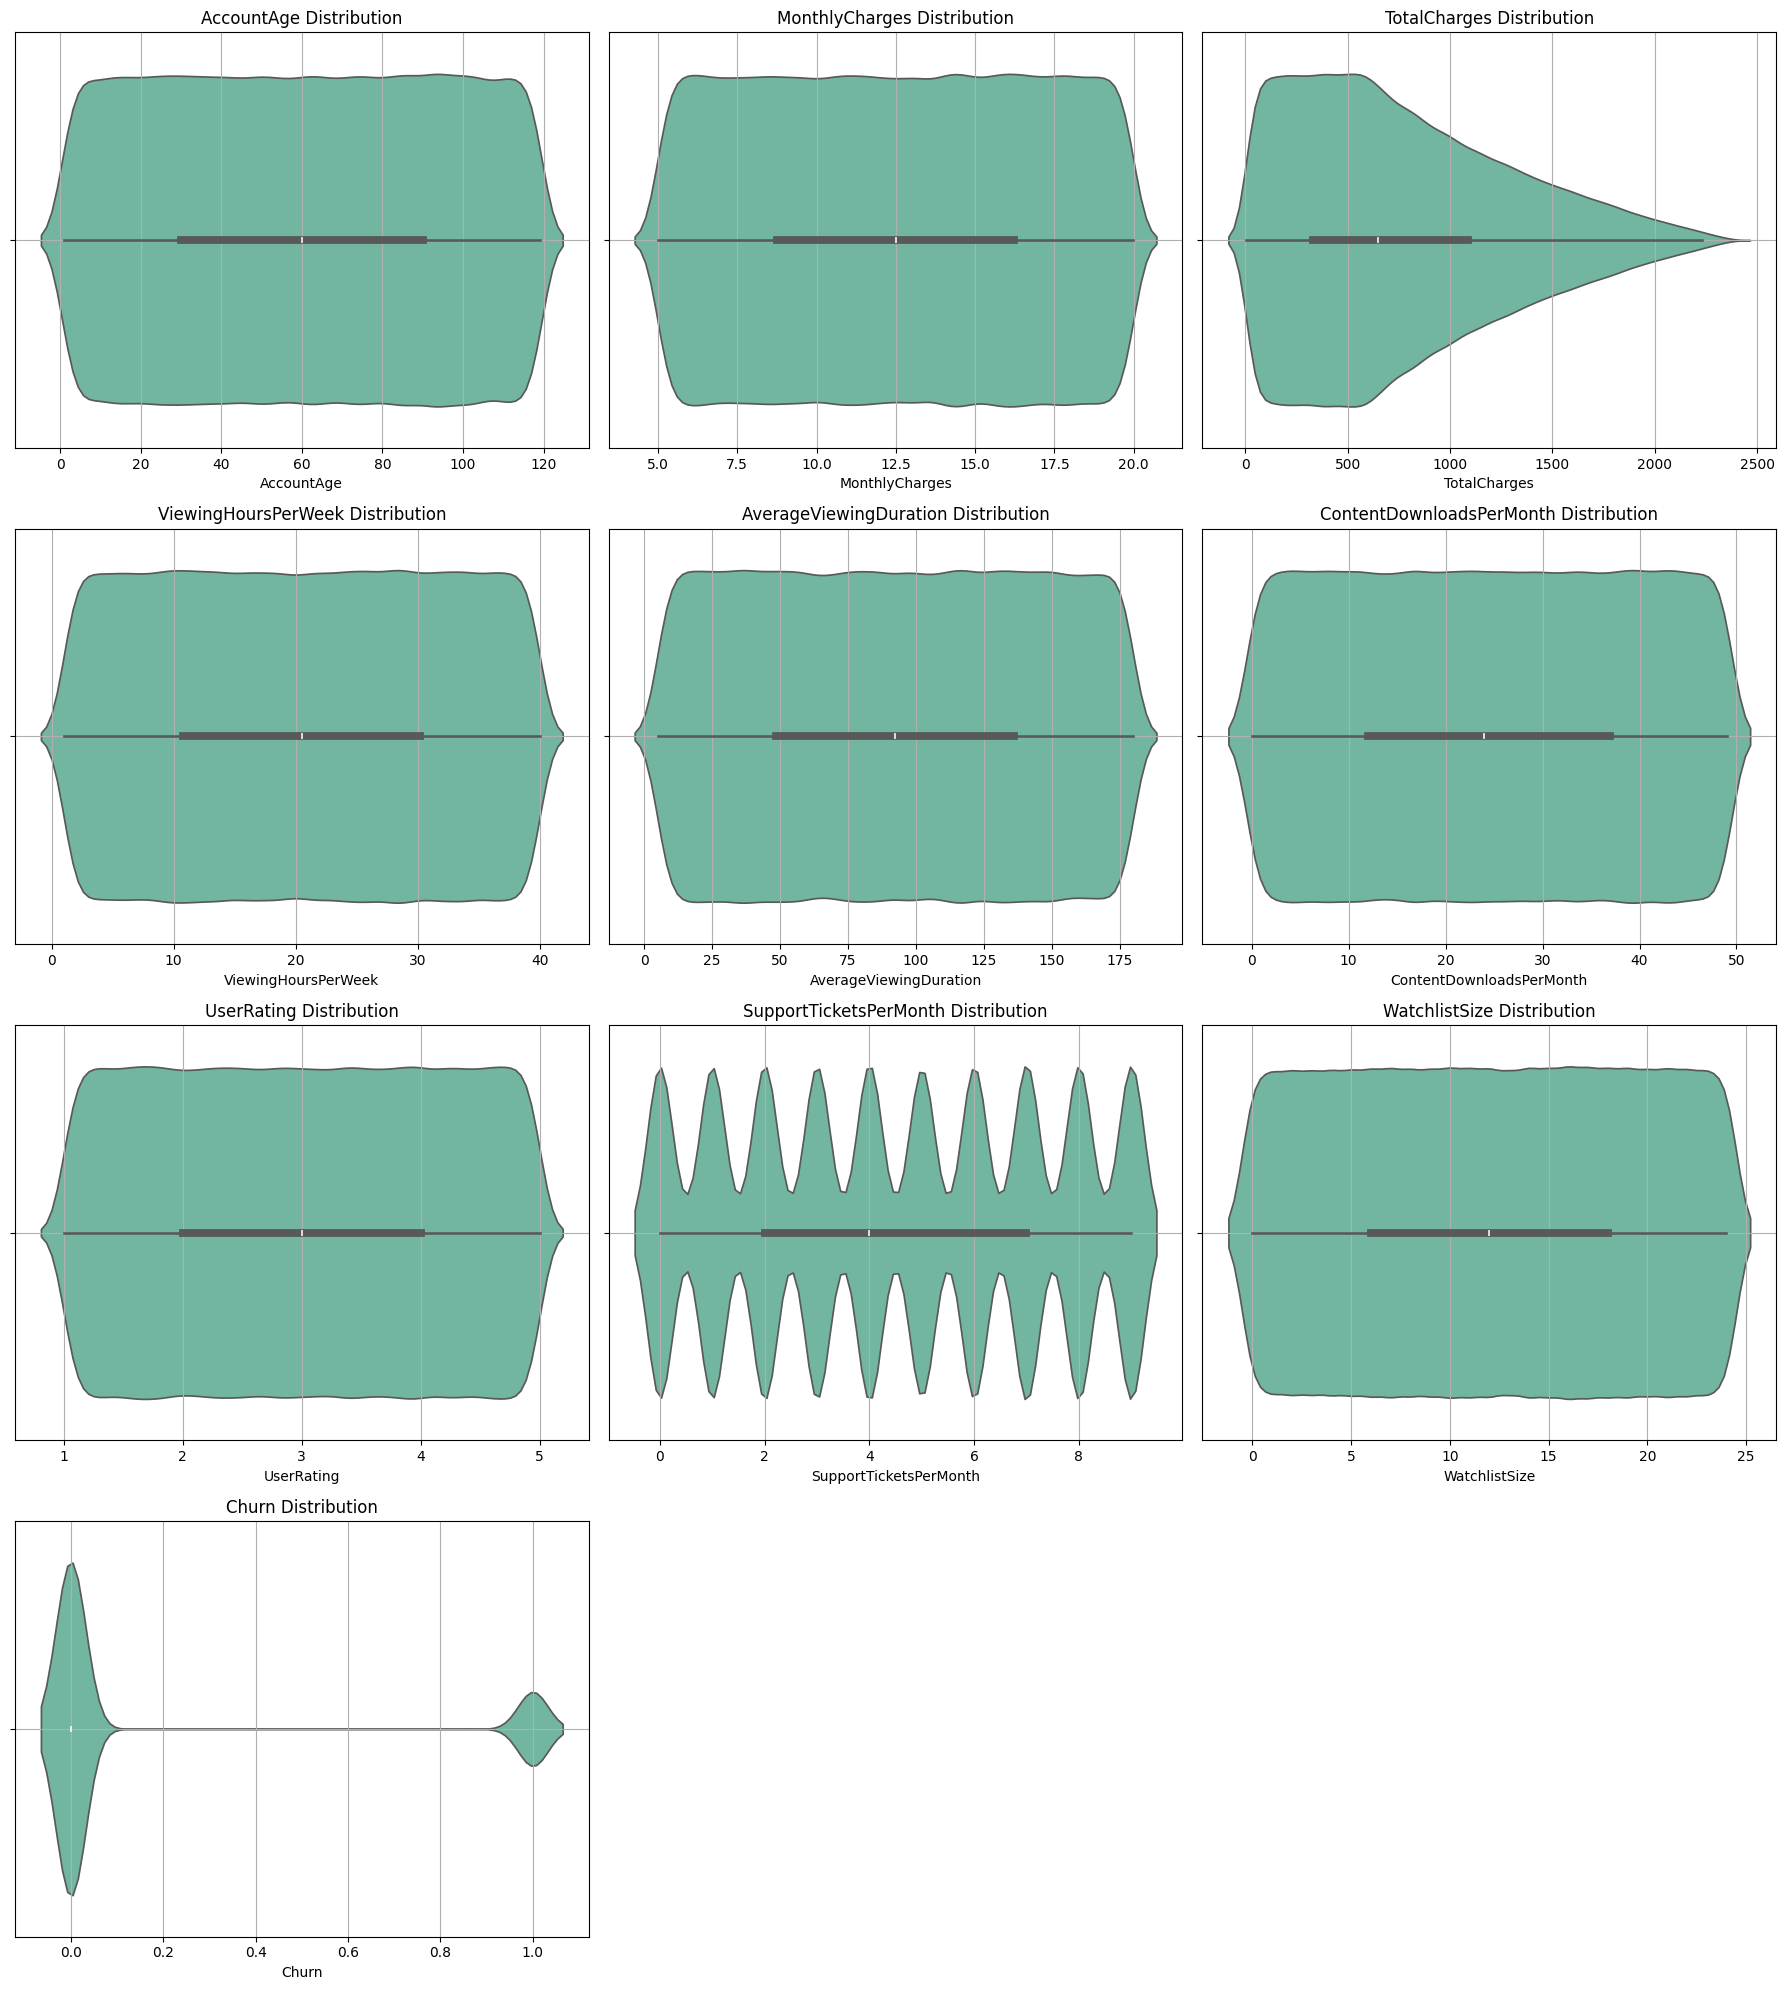

In [87]:
# 1.1 Distribution of numerical features
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(len(numerical_features)//3 + 1, 3, figsize=(18, 20))
palette = sns.color_palette("Set2")
for i, col in enumerate(numerical_features):
    row, col_idx = divmod(i, 3)
    sns.violinplot(x=col, data=train_data, ax=axes[row, col_idx], palette=palette)
    axes[row, col_idx].set_title(f'{col} Distribution')
    axes[row, col_idx].grid(True)

if len(numerical_features) % 3 != 0:
    for j in range(len(numerical_features) % 3, 3):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()

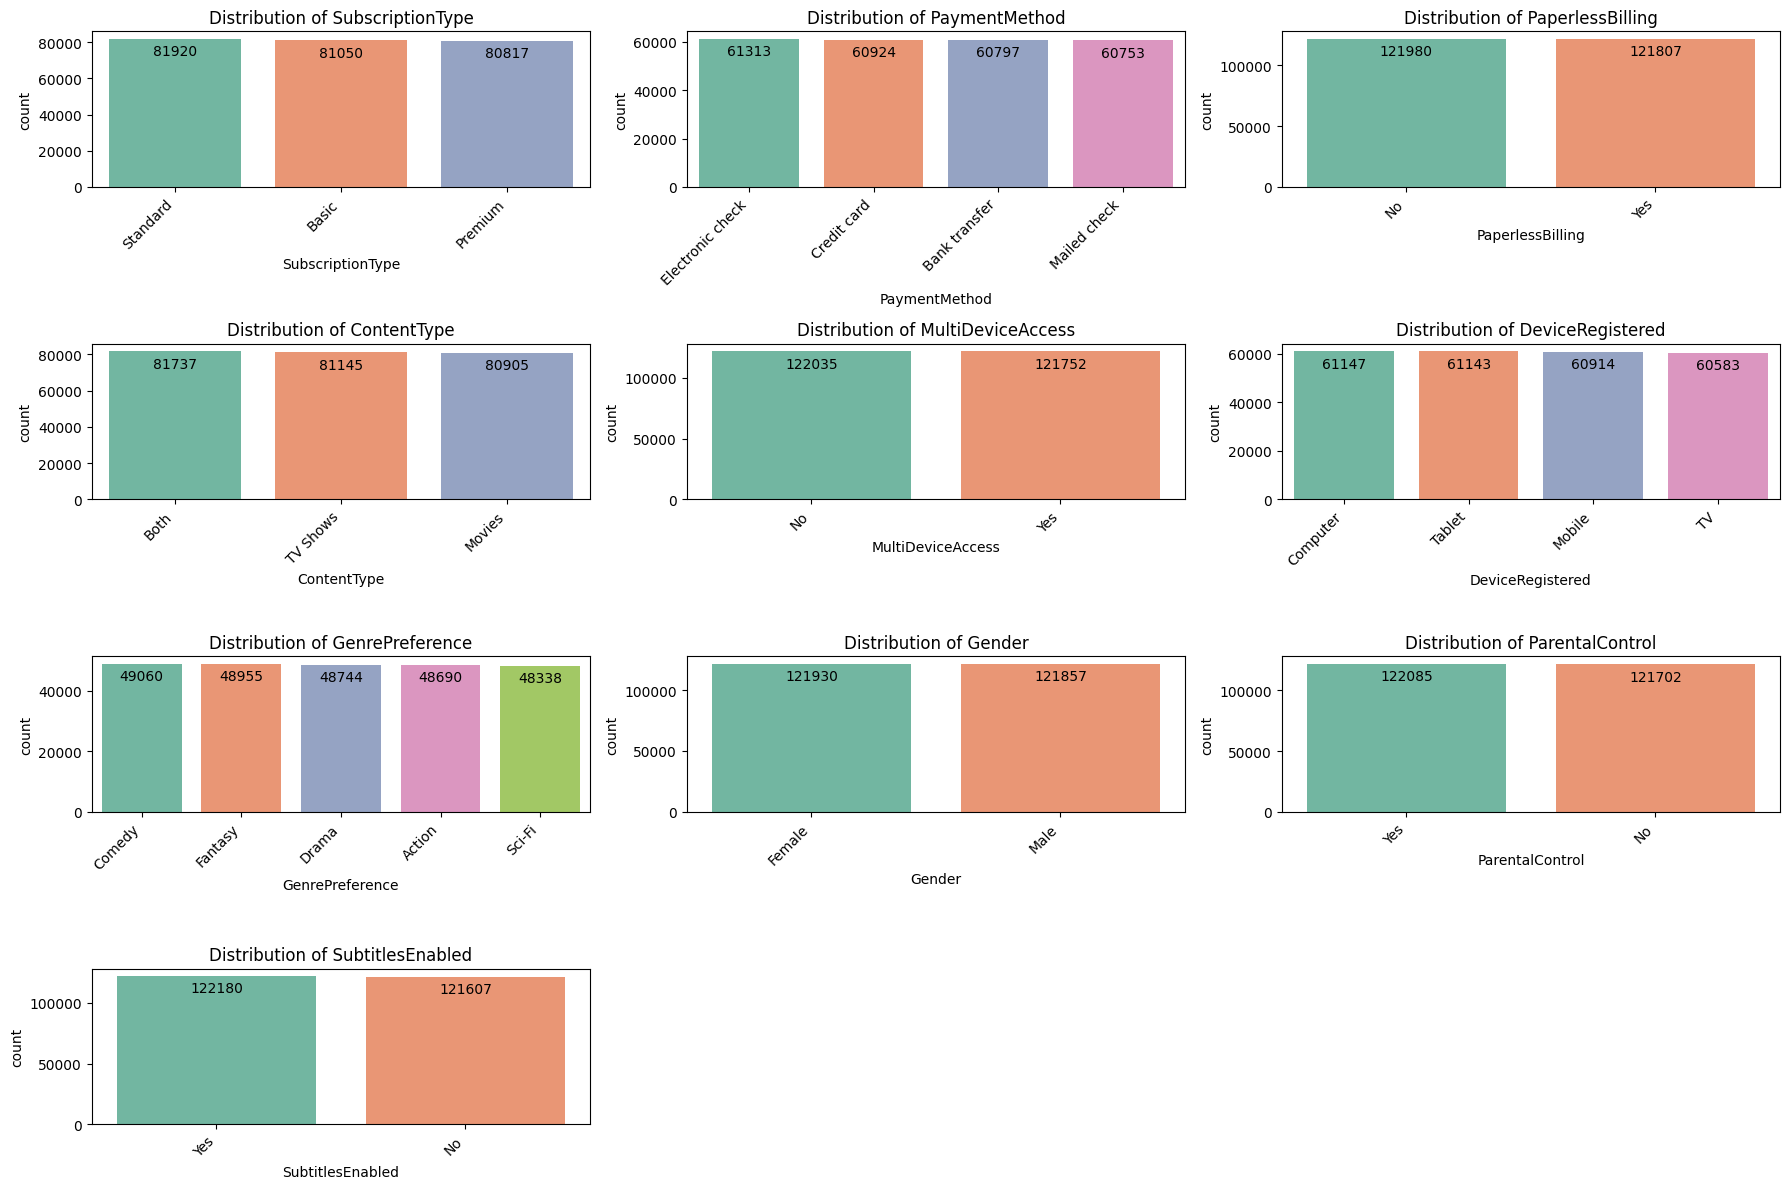

In [88]:
# 1.2 Distribution of categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('CustomerID')

fig, axs = plt.subplots(4, 3, figsize=(18, 12))
axs = axs.flatten()
palette = sns.color_palette("Set2")
for i, feature in enumerate(categorical_features[:10]):
    plot = sns.countplot(x=train_data[feature], ax=axs[i], order=train_data[feature].value_counts().index, palette=palette)

    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, -9), textcoords = 'offset points')

    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [89]:
# 2.1 Correlation Matrix of Numerical Features
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns

pearson_correlation_matrix = train_data[numerical_features].corr(method='pearson') # (good for linear relationships)
spearman_correlation_matrix = train_data[numerical_features].corr(method='spearman') # (good for non-linear relationships)

print("Pearson Correlation Matrix:")
pearson_correlation_matrix

Pearson Correlation Matrix:


AccountAge  MonthlyCharges  TotalCharges  \
AccountAge                  1.000000        0.001706      0.820144   
MonthlyCharges              0.001706        1.000000      0.498207   
TotalCharges                0.820144        0.498207      1.000000   
ViewingHoursPerWeek        -0.001640       -0.003029     -0.003006   
AverageViewingDuration      0.000191       -0.000604      0.000860   
ContentDownloadsPerMonth    0.001220       -0.000127      0.000208   
UserRating                  0.000440        0.000056      0.000609   
SupportTicketsPerMonth     -0.002055        0.000071     -0.001770   
WatchlistSize              -0.002640       -0.000540     -0.001770   
Churn                      -0.197736        0.100473     -0.120529   

                          ViewingHoursPerWeek  AverageViewingDuration  \
AccountAge                          -0.001640                0.000191   
MonthlyCharges                      -0.003029               -0.000604   
TotalCharges                        -0.003006                0.000860   
ViewingHoursPerWeek                  1.000000                0.000949   
AverageViewingDuration               0.000949                1.000000   
ContentDownloadsPerMonth             0.002149               -0.002397   
UserRating                          -0.003185               -0.000406   
SupportTicketsPerMonth               0.000788               -0.000158   
WatchlistSize                       -0.000750                0.000749   
Churn                               -0.128645               -0.146897   

                          ContentDownloadsPerMonth  UserRating  \
AccountAge                                0.001220    0.000440   
MonthlyCharges                           -0.000127    0.000056   
TotalCharges                              0.000208    0.000609   
ViewingHoursPerWeek                       0.002149   -0.003185   
AverageViewingDuration                   -0.002397   -0.000406   
ContentDownloadsPerMonth                  1.000000    0.001294   
UserRating                                0.001294    1.000000   
SupportTicketsPerMonth                   -0.000497   -0.000142   
WatchlistSize                             0.002324    0.002567   
Churn                                    -0.129752    0.022124   

                          SupportTicketsPerMonth  WatchlistSize     Churn  
AccountAge                             -0.002055      -0.002640 -0.197736  
MonthlyCharges                          0.000071      -0.000540  0.100473  
TotalCharges                           -0.001770      -0.001770 -0.120529  
ViewingHoursPerWeek                     0.000788      -0.000750 -0.128645  
AverageViewingDuration                 -0.000158       0.000749 -0.146897  
ContentDownloadsPerMonth               -0.000497       0.002324 -0.129752  
UserRating                             -0.000142       0.002567  0.022124  
SupportTicketsPerMonth                  1.000000       0.001250  0.084064  
WatchlistSize                           0.001250       1.000000  0.021739  
Churn                                   0.084064       0.021739  1.000000

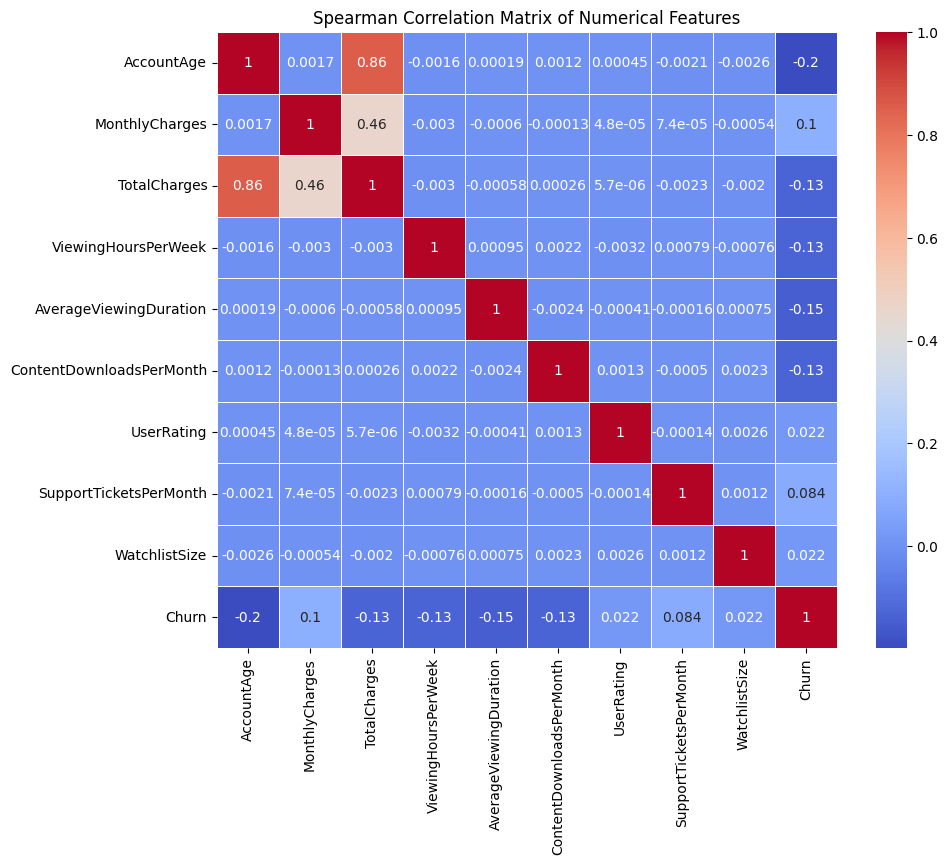

In [90]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Correlation Matrix of Numerical Features')
plt.show()

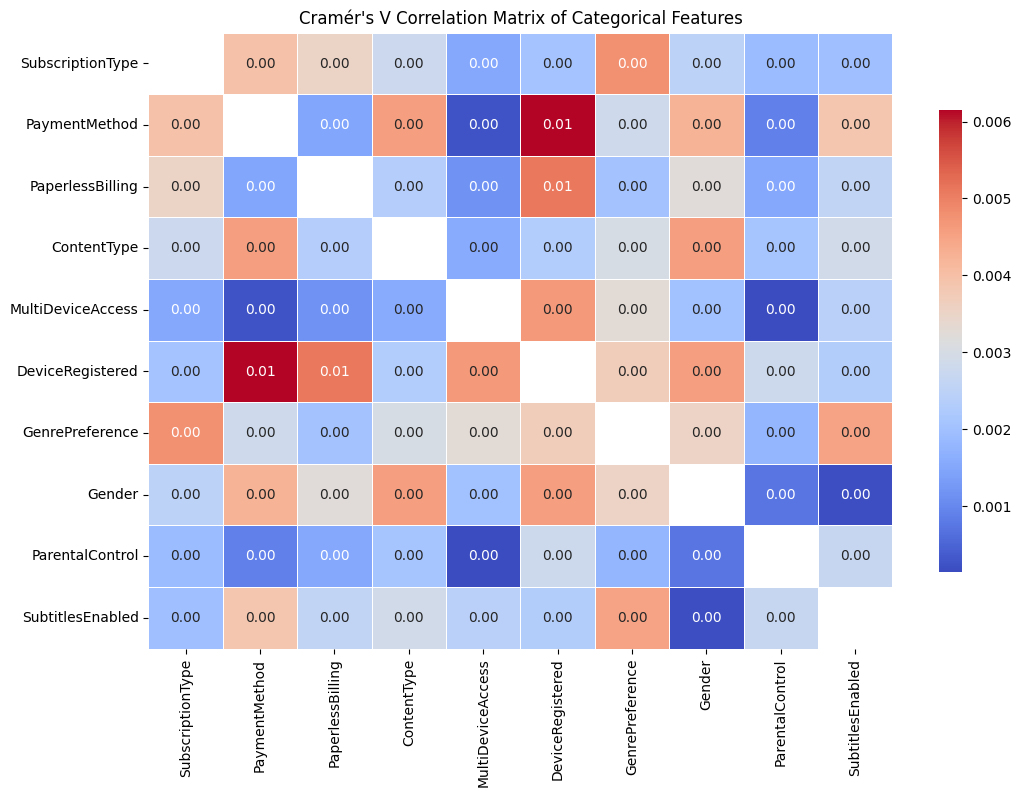

In [91]:
# 2.2 Correlation Matrix of Categorical Features
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

categorical_features = train_data.drop(['CustomerID'], axis=1).select_dtypes(include=['object']).columns
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_features), len(categorical_features))), index=categorical_features, columns=categorical_features)

for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 != col2:
            cramers_v_matrix.loc[col1, col2] = cramers_v(train_data[col1], train_data[col2])
        else:
            cramers_v_matrix.loc[col1, col2] = np.nan  # Set the diagonal to NaN

# Plotting the Cramér's V correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', cbar_kws={"shrink": .75})
plt.title("Cramér's V Correlation Matrix of Categorical Features")
plt.show()

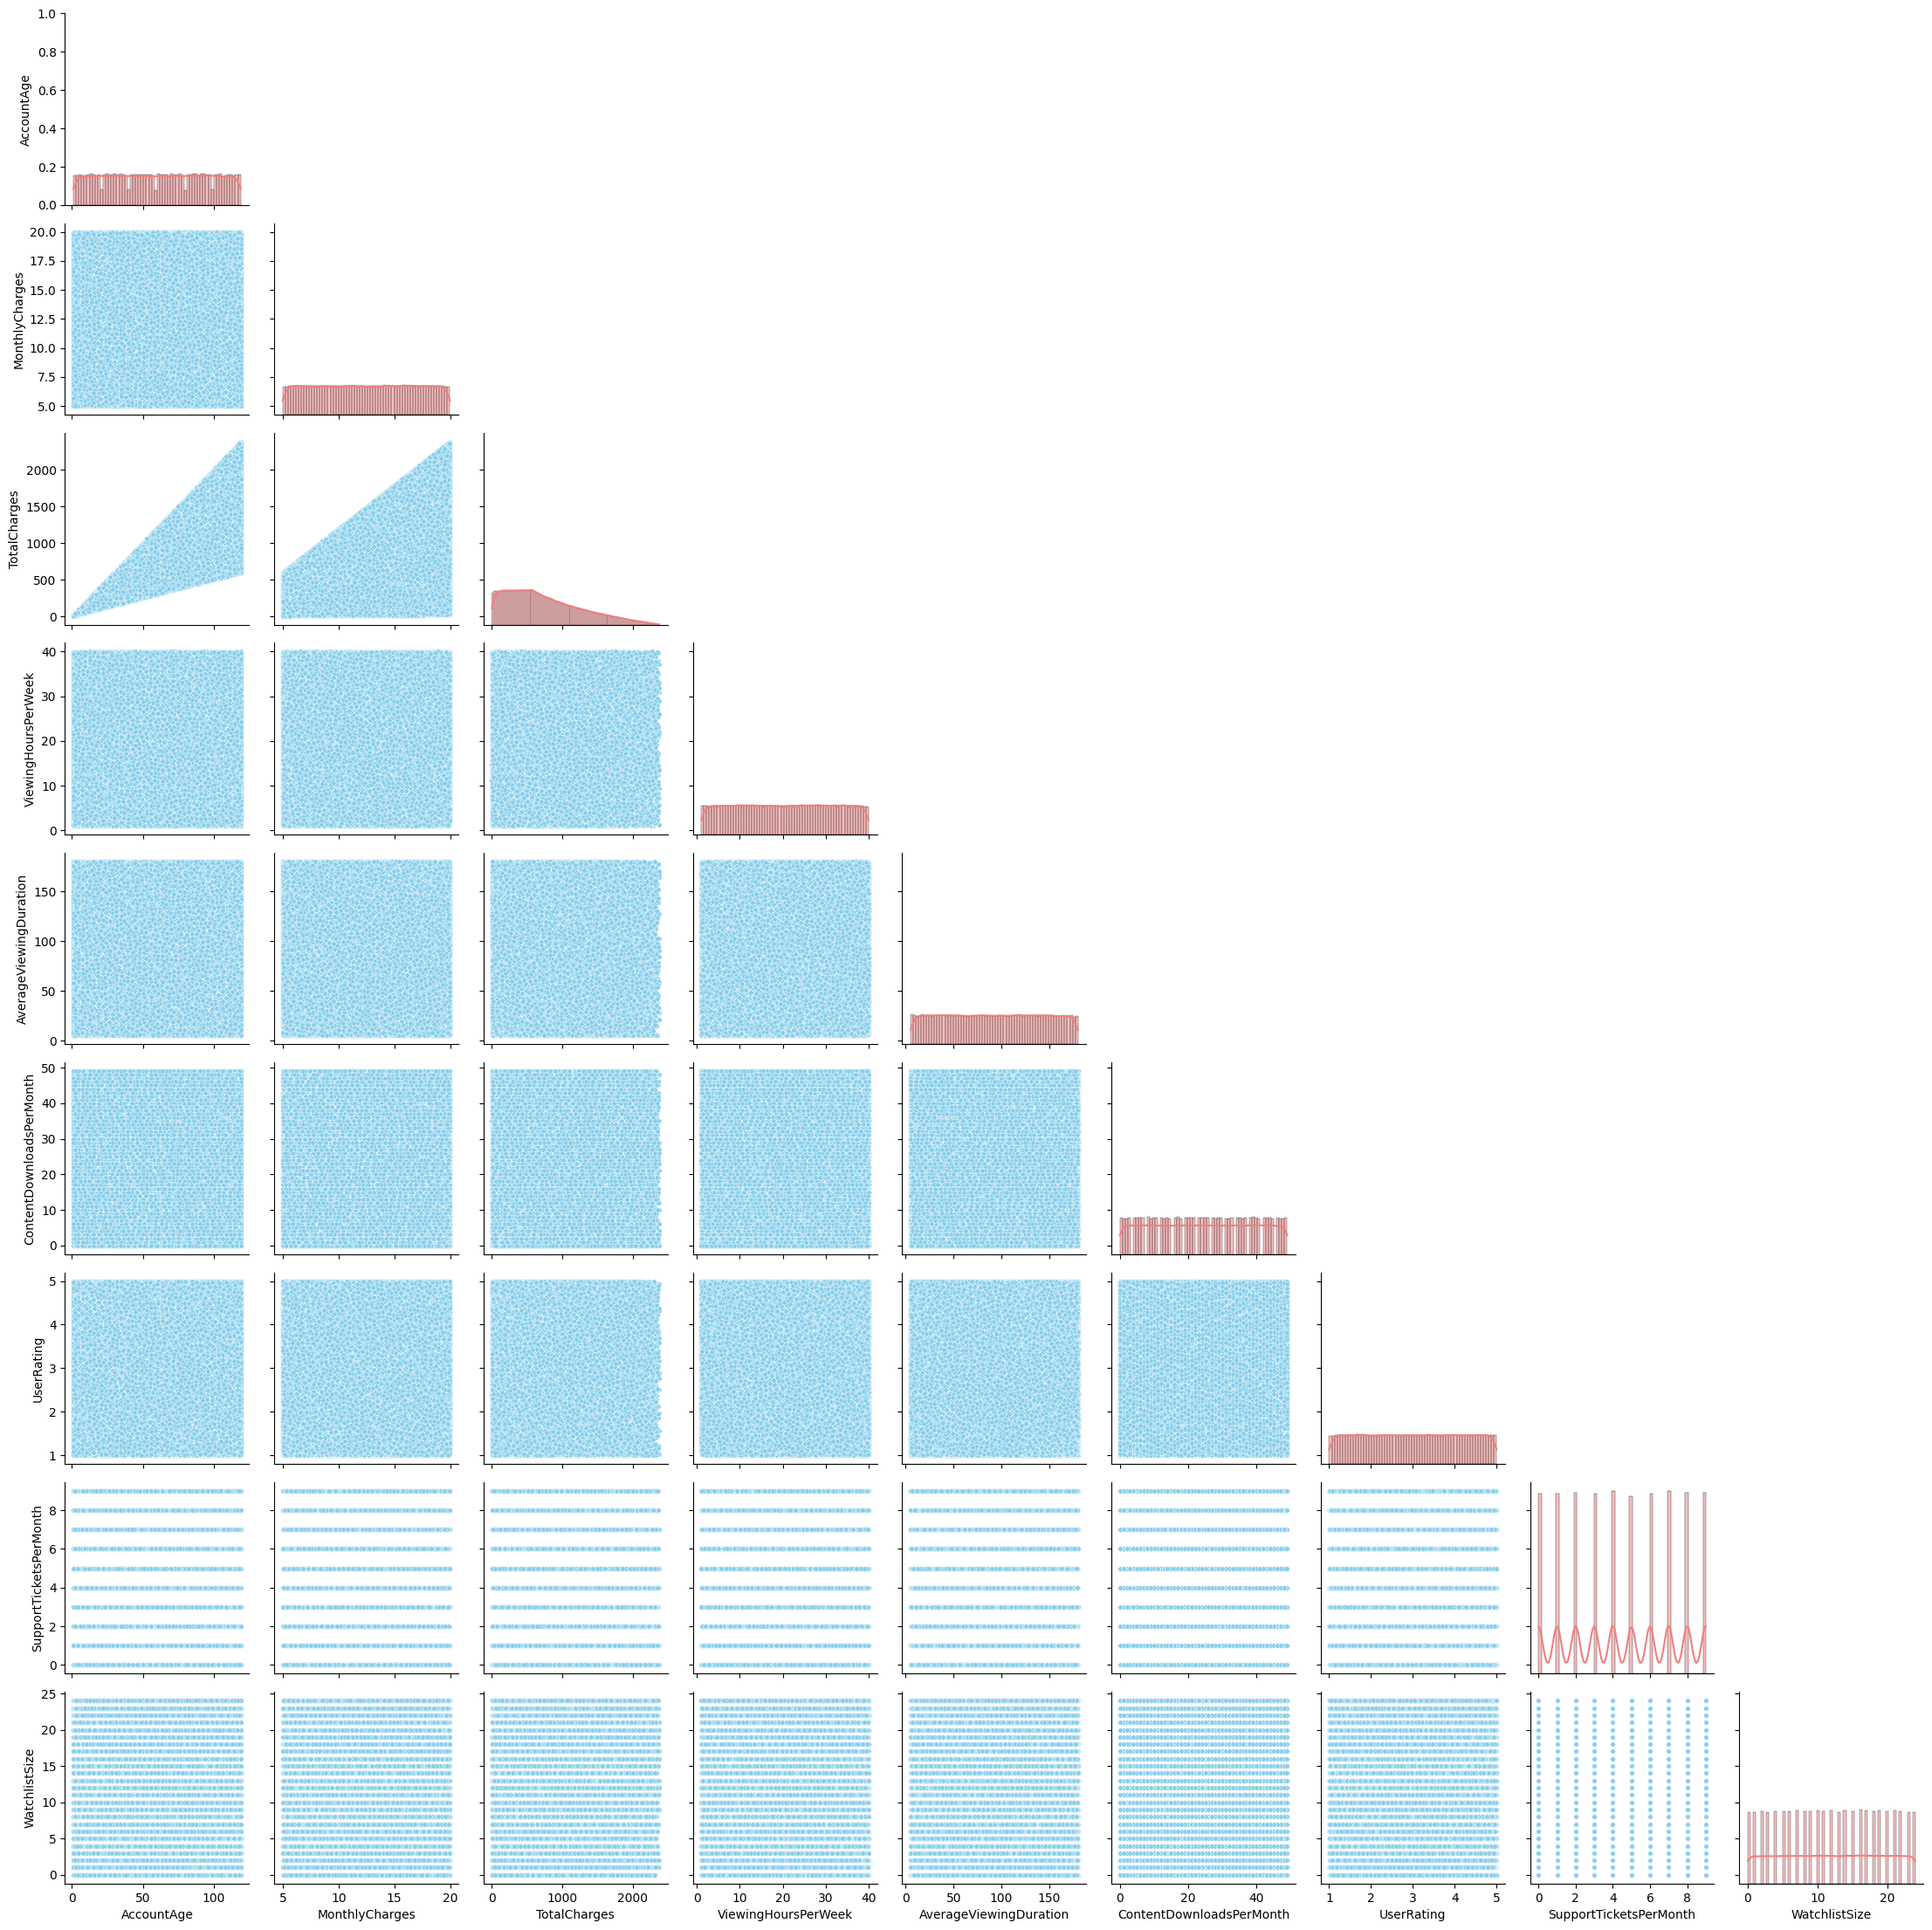

In [92]:
# 2.3 Pairplot
numerical_features = train_data.drop('Churn', axis=1).select_dtypes(include=['float64', 'int64']).columns

def below_diag_pairplot(data, variables):
    g = sns.PairGrid(data[variables])
    g.map_lower(sns.scatterplot, s=15, color='skyblue')
    g.map_diag(sns.histplot, color='lightcoral', kde=True, palette=palette)

    for i, j in zip(*np.triu_indices_from(g.axes, 1)):
        g.axes[i, j].set_visible(False)

    plt.show()

below_diag_pairplot(train_data, numerical_features)

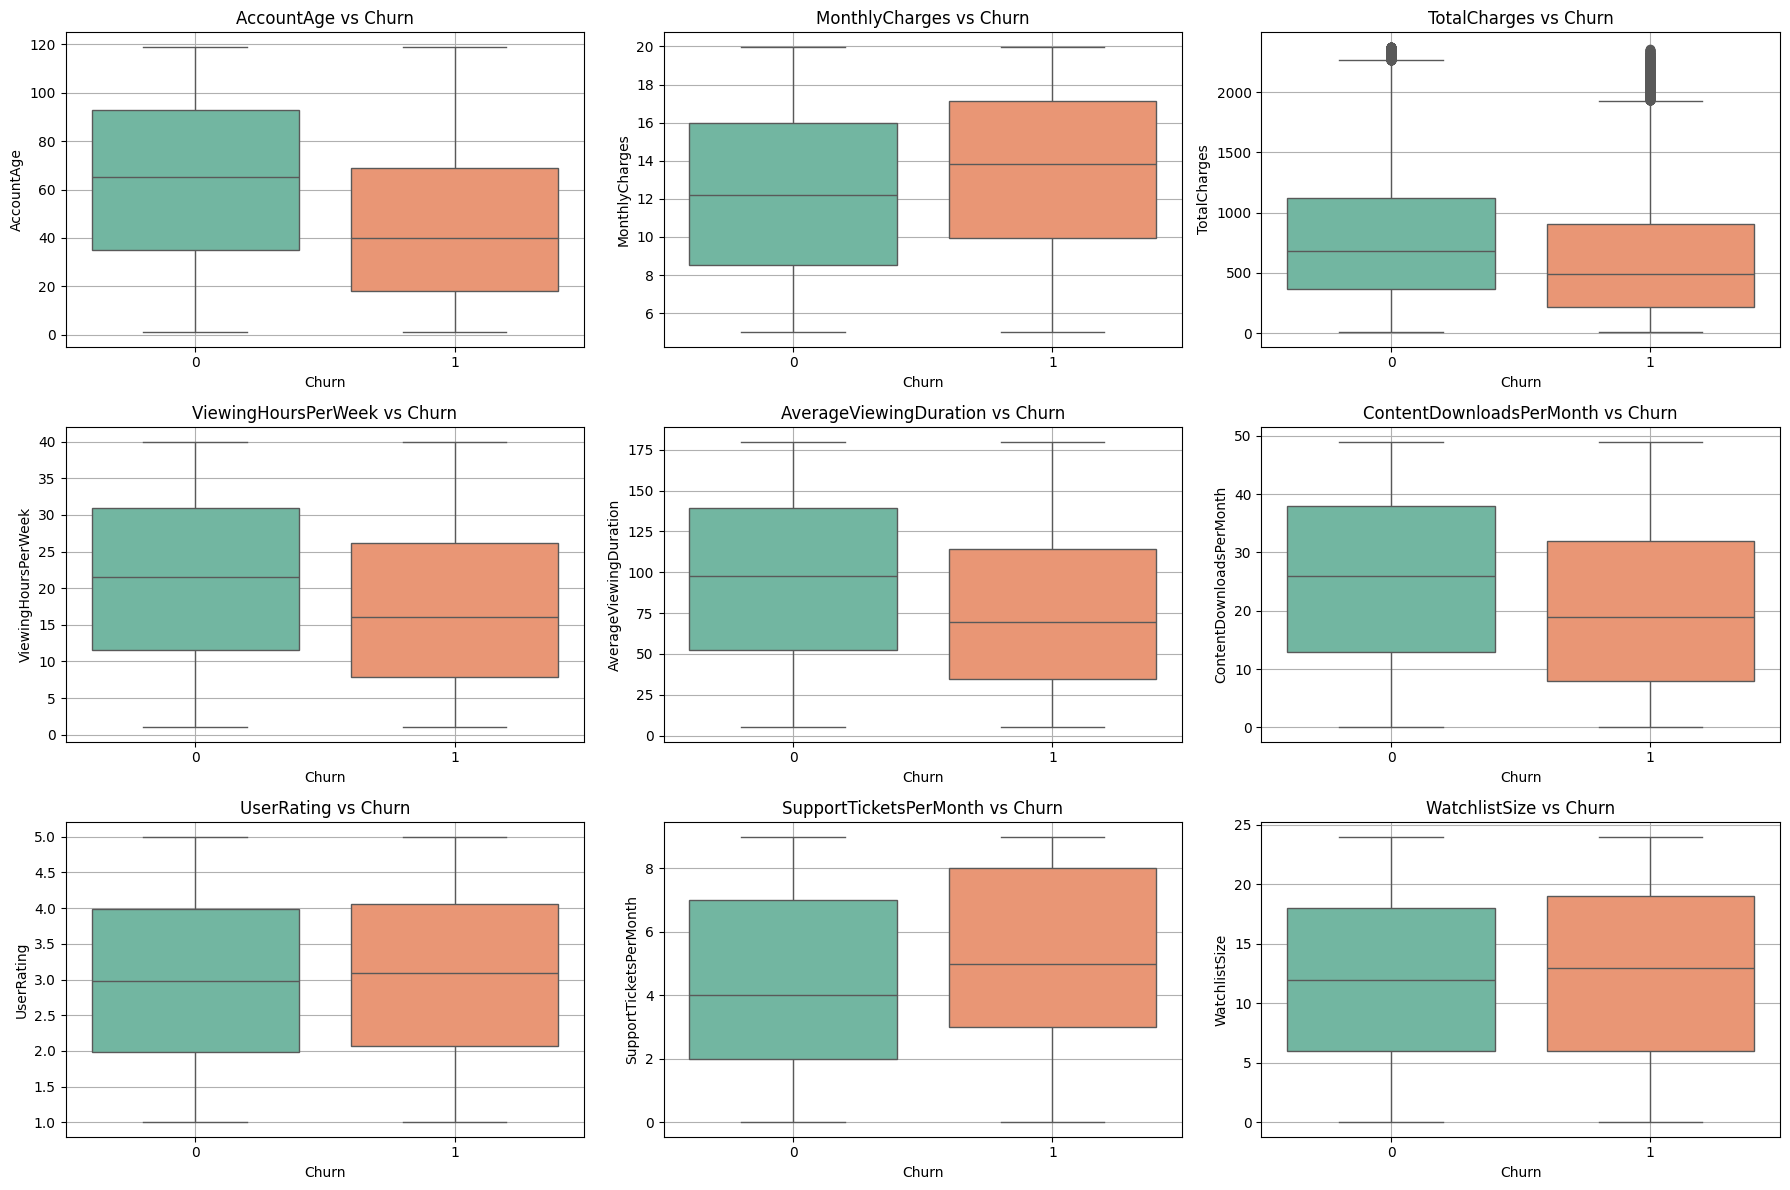

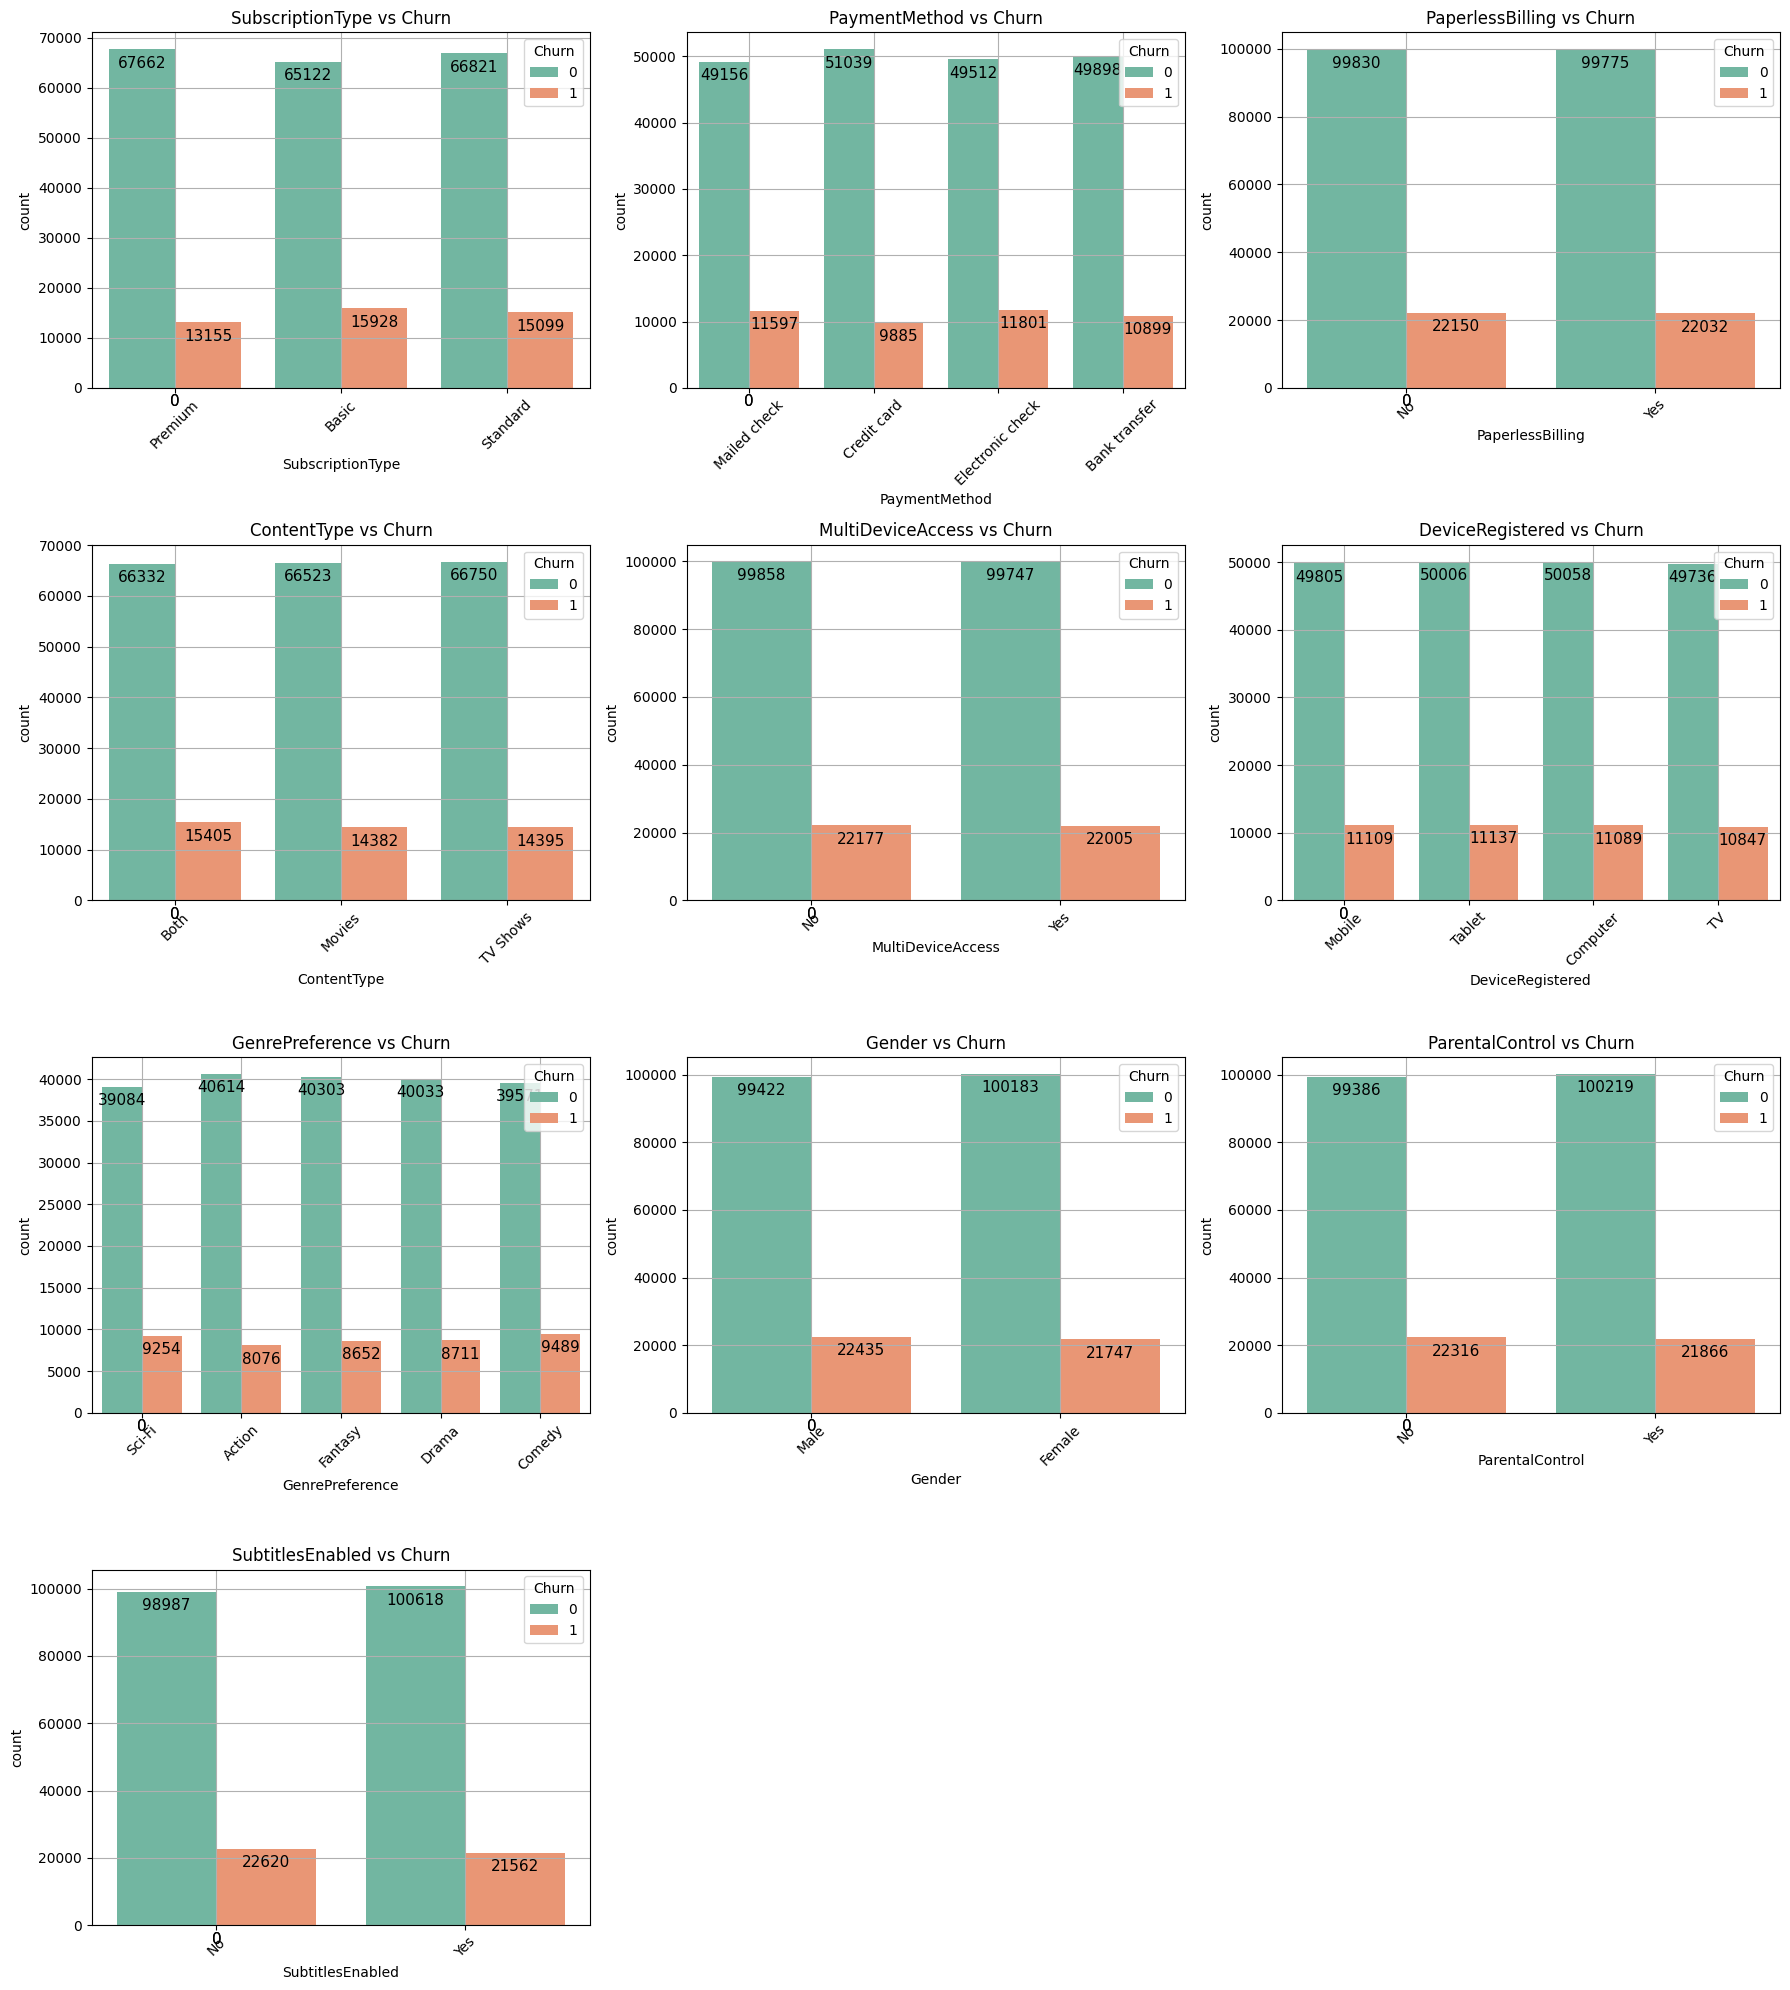

In [93]:
# 3. Relationship between feature and target variable: Churn
numerical_features = train_data.drop('Churn', axis=1).select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Churn', y=col, data=train_data, palette=palette)
    plt.title(f'{col} vs Churn')
    plt.grid(True)

plt.tight_layout()
plt.show()

categorical_features = train_data.drop('CustomerID', axis=1).select_dtypes(include=['object']).columns

plt.figure(figsize=(18, 20))
for i, col in enumerate(categorical_features):
    plt.subplot(4, 3, i + 1)
    ax = sns.countplot(x=col, hue='Churn', data=train_data, palette=palette)
    plt.title(f'{col} vs Churn')
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=45)
    plt.grid(True)

    # Adding the counts inside the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=11, color='black',
                    xytext=(0, -10), textcoords='offset points')

plt.tight_layout()
plt.show()

#### Observations from Numerical Variables:
- AccountAge: Customers with longer account tenures are less likely to churn, as seen in the bivariate analysis, indicating that retention improves over time.

- MonthlyCharges: Higher monthly charges correlate slightly with increased churn. This suggests that customers with higher bills may be more price-sensitive or feel they aren't receiving equivalent value.

- TotalCharges: The distribution of TotalCharges is right-skewed which suggests that while many customers have accumulated moderate total charges, a smaller group has much higher accumulated charges, potentially indicating long-term or high-usage customers. Customers with lower total charges are more likely to churn, likely indicating that newer or less engaged customers are more prone to leaving the service.

- ViewingHoursPerWeek: The distribution shows that most customers watch content for a moderate number of hours per week, with fewer customers watching either very little or a lot of content. As expected, customers who watch more content are less likely to churn. This indicates engagement plays a significant role in customer retention.

- AverageViewingDuration: This feature has a similar pattern to ViewingHoursPerWeek, showing a diverse range of viewing durations across customers. Those with shorter average viewing durations seem more likely to churn. Customers who consume content in longer sessions may be more engaged with the platform, contributing to lower churn.

- ContentDownloadsPerMonth: Customers who download more content are likely more engaged, potentially leading to lower churn rates.

- UserRating: Higher user ratings are slightly correlated with lower churn, suggesting that satisfaction with the service contributes to retention. However, this relationship is relatively weak.

- SupportTicketsPerMonth: Higher numbers of support tickets may indicate dissatisfaction, which could contribute to a higher likelihood of churn, although the direct correlation isn’t very strong.

- WatchlistSize: Having a larger watchlist might imply deeper engagement with the service, potentially leading to lower churn rates, although the direct correlation isn’t very strong.

#### Observations from Categorical Variables:
- SubscriptionType: Certain subscription types have higher churn rates, particularly basic. Premium subscription plans show lower churn rates, suggesting that customers perceive higher value from these plans.

- PaymentMethod: Customers using manual payment methods (e.g., checks or manual debit payments) are more likely to churn compared to those using automatic payment methods like credit cards. This implies that convenience in payment is a factor influencing retention.

- PaperlessBilling: Customers who have opted for paperless billing show lower churn rates compared to those who receive paper bills. This could indicate that paperless billing customers are more engaged with the service or prefer digital interactions, which improves retention.

- ContentType: Customers who consume content only TV shows or Movies tend to churn less, while those accessing both might be more prone to churn.

- MultiDeviceAccess: Customers with multi-device access tend to have lower churn rates. This suggests that flexibility and convenience in using the service on multiple devices increase customer loyalty and engagement.

- DeviceRegistered: Devices like TV and computers show lower churn rates, indicating that customers who prefer using these devices are more satisfied with their experience. Other devices, such as tablets and mobiles, have slightly higher churn rates, potentially due to a less optimal user experience.

- GenrePreference: Genre preferences affect churn, with customers who prefer genre like Action exhibiting lower churn rates. Those who prefer other genres may churn at higher rates, possibly due to limited content availability in those genres.

- Gender: There is no significant difference in churn rates between male and female customers, suggesting that gender alone is not a strong predictor of churn.

- ParentalControl: Customers with parental controls enabled tend to churn less frequently. This may be because families with children place higher value on these controls and are more likely to stay with the service.

- SubtitlesEnabled: Enabling subtitles is associated with lower churn rates. This suggests that accessibility features like subtitles enhance customer satisfaction and retention, particularly for customers who rely on them.

#### Key Takeaways from EDA:

- Tenure: AccountAge is a key predictor of churn, with longer-tenured customers less likely to leave.

- Engagement: Features related to engagement, such as ViewingHoursPerWeek, AverageViewingDuration, ContentDownloadsPerMonth and WatchlistSize, are strong predictors of retention. Highly engaged customers are much less likely to churn.

- Price Sensitivity: Customers with higher MonthlyCharges are more likely to churn, indicating that cost can be a significant factor in whether a customer decides to stay or leave.

- Convenience Features: Features like PaperlessBilling, MultiDeviceAccess, ParentalControl and SubtitlesEnabled positively impact retention, highlighting the importance of convenience and accessibility.

- Content Preferences and Devices: Customers’ preferences for specific genres, content types and devices play a crucial role in retention, emphasizing the need for variety and quality in content offerings.

- Customer Experience: Issues like high numbers of SupportTicketsPerMonth are linked to higher churn, signaling that poor customer service or unresolved issues can drive customers away.

We do see that AccountAge & TotalCharges are highly correlated (0.86) and MonthlyCharges & TotalCharges are moderately correlated (0.46) which is expected


### Feature Engineering
- Transform features: Scaling numerical features, encoding categorical features

<h4>Feature Encoding on Train Data</h1>

In [94]:
#Removing unnecessary features
train_data.drop(columns={"CustomerID"},inplace=True)
test_data.drop(columns={"CustomerID"},inplace=True)

In [95]:
#Finding Categorical  Columns
cat_col=[]
for col  in test_data.columns:
    if(test_data[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} categorical columns in datset")
print(cat_col)

There are total 10 categorical columns in datset
['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']


In [96]:
#Finding Numerical Columns
num_col=[]
for col in test_data.columns:
    if(test_data[col].dtypes!='object'):
        num_col.append(col)
print(f"There are total {len(num_col)} numerical columns in dataset")
print(num_col)

There are total 9 numerical columns in dataset
['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']


In [97]:
#Feature Encoding
train_data[cat_col].sample(3)

SubscriptionType     PaymentMethod PaperlessBilling ContentType  \
48772             Basic  Electronic check               No    TV Shows   
119060         Standard       Credit card              Yes        Both   
163431         Standard      Mailed check              Yes    TV Shows   

       MultiDeviceAccess DeviceRegistered GenrePreference  Gender  \
48772                 No           Tablet          Comedy  Female   
119060                No           Tablet          Action  Female   
163431               Yes               TV         Fantasy  Female   

       ParentalControl SubtitlesEnabled  
48772              Yes               No  
119060             Yes              Yes  
163431             Yes              Yes

In [98]:
#Encoding on Training data
SubscriptionType_encoder=LabelEncoder()
train_data['SubscriptionType']=SubscriptionType_encoder.fit_transform(train_data['SubscriptionType'])

PaymentMethod_encoder=LabelEncoder()
train_data['PaymentMethod']=PaymentMethod_encoder.fit_transform(train_data['PaymentMethod'])

PaperlessBilling_encoder=LabelEncoder()
train_data['PaperlessBilling']=PaperlessBilling_encoder.fit_transform(train_data['PaperlessBilling'])

ContentType_encoder=LabelEncoder()
train_data['ContentType']=ContentType_encoder.fit_transform(train_data['ContentType'])

MultiDeviceAccess_encoder=LabelEncoder()
train_data['MultiDeviceAccess']=MultiDeviceAccess_encoder.fit_transform(train_data['MultiDeviceAccess'])

DeviceRegistered_encoder=LabelEncoder()
train_data['DeviceRegistered']=DeviceRegistered_encoder.fit_transform(train_data['DeviceRegistered'])

GenrePreference_encoder=LabelEncoder()
train_data['GenrePreference']=GenrePreference_encoder.fit_transform(train_data['GenrePreference'])

Gender_encoder=LabelEncoder()
train_data['Gender']=Gender_encoder.fit_transform(train_data['Gender'])

ParentalControl_encoder=LabelEncoder()
train_data['ParentalControl']=ParentalControl_encoder.fit_transform(train_data['ParentalControl'])

SubtitlesEnabled_encoder=LabelEncoder()
train_data['SubtitlesEnabled']=SubtitlesEnabled_encoder.fit_transform(train_data['SubtitlesEnabled'])

In [99]:
#After Encoding
train_data[cat_col].sample(5)

SubscriptionType  PaymentMethod  PaperlessBilling  ContentType  \
197969                 1              3                 0            2   
41777                  0              1                 0            0   
219787                 0              1                 1            1   
45235                  0              2                 0            2   
148568                 0              1                 1            2   

        MultiDeviceAccess  DeviceRegistered  GenrePreference  Gender  \
197969                  1                 3                2       1   
41777                   0                 1                2       0   
219787                  0                 0                1       0   
45235                   0                 3                4       1   
148568                  0                 2                4       0   

        ParentalControl  SubtitlesEnabled  
197969                0                 0  
41777                 1                 1  
219787                1                 0  
45235                 0                 0  
148568                0                 1

<h4>Feature Encoding on Test Data</h1>

In [100]:
#SubscriptionType
test_data['SubscriptionType']=SubscriptionType_encoder.transform(test_data['SubscriptionType'])

#PaymentMethod
test_data['PaymentMethod']=PaymentMethod_encoder.transform(test_data['PaymentMethod'])

#PaperlessBilling
test_data['PaperlessBilling']=PaperlessBilling_encoder.transform(test_data['PaperlessBilling'])

#ContentType
test_data['ContentType']=ContentType_encoder.transform(test_data['ContentType'])

#MultiDeviceAccess
test_data['MultiDeviceAccess']=MultiDeviceAccess_encoder.transform(test_data['MultiDeviceAccess'])

#DeviceRegistered
test_data['DeviceRegistered']=DeviceRegistered_encoder.transform(test_data['DeviceRegistered'])

#GenrePreference
test_data['GenrePreference']=GenrePreference_encoder.transform(test_data['GenrePreference'])

#Gender
test_data['Gender']=Gender_encoder.transform(test_data['Gender'])

#ParentalControl
test_data['ParentalControl']=ParentalControl_encoder.transform(test_data['ParentalControl'])

#SubtitlesEnabled
test_data['SubtitlesEnabled']=SubtitlesEnabled_encoder.transform(test_data['SubtitlesEnabled'])

In [101]:
#After Encoding
test_data[cat_col].sample(3)

SubscriptionType  PaymentMethod  PaperlessBilling  ContentType  \
34017                 1              2                 0            2   
67828                 2              3                 0            1   
41809                 0              0                 1            2   

       MultiDeviceAccess  DeviceRegistered  GenrePreference  Gender  \
34017                  0                 2                0       0   
67828                  1                 2                0       1   
41809                  0                 2                1       1   

       ParentalControl  SubtitlesEnabled  
34017                0                 1  
67828                0                 1  
41809                1                 0

In [102]:
#Before Scaling Training Data
train_data[num_col].sample(3)

AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
166404         114       14.108175   1608.331934             5.797207   
31756           42        8.630067    362.462813            26.812743   
151980          42        7.245197    304.298291            31.679411   

        AverageViewingDuration  ContentDownloadsPerMonth  UserRating  \
166404              124.131713                         3    2.798136   
31756               106.954688                        44    1.632500   
151980              148.576673                        42    1.130042   

        SupportTicketsPerMonth  WatchlistSize  
166404                       0              3  
31756                        3             23  
151980                       1             15

<h4>Feature Selection</h1>

In [103]:
#Feature and Target
Feature=train_data.drop(columns="Churn")
Target=train_data['Churn']

<h4>Feature Scaling on Train Data</h1>

In [104]:
X_train, X_test, y_train, y_test = train_test_split(Feature, Target, test_size = 0.25, random_state = 0)

In [105]:
#Feature Scaling 
#AccountAge
AccountAge_scaler=StandardScaler()
X_train['AccountAge']=AccountAge_scaler.fit_transform(np.array(X_train['AccountAge']).reshape(len(X_train['AccountAge']),1))

#MonthlyCharges
MonthlyCharges_scaler=StandardScaler()
X_train['MonthlyCharges']=MonthlyCharges_scaler.fit_transform(np.array(X_train['MonthlyCharges']).reshape(len(X_train['MonthlyCharges']),1))

#TotalCharges
TotalCharges_scaler=StandardScaler()
X_train['TotalCharges']=TotalCharges_scaler.fit_transform(np.array(X_train['TotalCharges']).reshape(len(X_train['TotalCharges']),1))

#ViewingHoursPerWeek
ViewingHoursPerWeek_scaler=StandardScaler()
X_train['ViewingHoursPerWeek']=ViewingHoursPerWeek_scaler.fit_transform(np.array(X_train['ViewingHoursPerWeek']).reshape(len(X_train['ViewingHoursPerWeek']),1))

#AverageViewingDuration
AverageViewingDuration_scaler=StandardScaler()
X_train['AverageViewingDuration']=AverageViewingDuration_scaler.fit_transform(np.array(X_train['AverageViewingDuration']).reshape(len(X_train['AverageViewingDuration']),1))

#ContentDownloadsPerMonth
ContentDownloadsPerMonth_scaler=StandardScaler()
X_train['ContentDownloadsPerMonth']=ContentDownloadsPerMonth_scaler.fit_transform(np.array(X_train['ContentDownloadsPerMonth']).reshape(len(X_train['ContentDownloadsPerMonth']),1))

#UserRating
UserRating_scaler=StandardScaler()
X_train['UserRating']=UserRating_scaler.fit_transform(np.array(X_train['UserRating']).reshape(len(X_train['UserRating']),1))

#SupportTicketsPerMonth
SupportTicketsPerMonth_scaler=StandardScaler()
X_train['SupportTicketsPerMonth']=SupportTicketsPerMonth_scaler.fit_transform(np.array(X_train['SupportTicketsPerMonth']).reshape(len(X_train['SupportTicketsPerMonth']),1))

#WatchlistSize
WatchlistSize_scaler=StandardScaler()
X_train['WatchlistSize']=WatchlistSize_scaler.fit_transform(np.array(X_train['WatchlistSize']).reshape(len(X_train['WatchlistSize']),1))

In [106]:
#After Scaling Training Data
X_train.sample(3)

AccountAge  MonthlyCharges  TotalCharges  SubscriptionType  \
89559    -0.762089       -0.444254     -0.749694                 1   
106749    1.454274       -0.414953      0.813298                 2   
22219     0.871021       -1.560671     -0.448259                 1   

        PaymentMethod  PaperlessBilling  ContentType  MultiDeviceAccess  \
89559               1                 0            2                  1   
106749              1                 0            1                  1   
22219               0                 1            0                  0   

        DeviceRegistered  ViewingHoursPerWeek  AverageViewingDuration  \
89559                  2            -0.660480               -0.361643   
106749                 3            -1.137382                0.098732   
22219                  0             1.510504               -0.988067   

        ContentDownloadsPerMonth  GenrePreference  UserRating  \
89559                  -0.173510                0    0.379773   
106749                  0.867475                4    0.895478   
22219                  -1.561489                2   -0.902283   

        SupportTicketsPerMonth  Gender  WatchlistSize  ParentalControl  \
89559                 0.172341       1      -1.534482                1   
106749                1.563238       1       1.248650                1   
22219                -1.218556       1      -1.534482                1   

        SubtitlesEnabled  
89559                  1  
106749                 1  
22219                  0

In [107]:
#Feature Scaling 
#AccountAge
AccountAge_scaler=StandardScaler()
X_test['AccountAge']=AccountAge_scaler.fit_transform(np.array(X_test['AccountAge']).reshape(len(X_test['AccountAge']),1))

#MonthlyCharges
MonthlyCharges_scaler=StandardScaler()
X_test['MonthlyCharges']=MonthlyCharges_scaler.fit_transform(np.array(X_test['MonthlyCharges']).reshape(len(X_test['MonthlyCharges']),1))

#TotalCharges
TotalCharges_scaler=StandardScaler()
X_test['TotalCharges']=TotalCharges_scaler.fit_transform(np.array(X_test['TotalCharges']).reshape(len(X_test['TotalCharges']),1))

#ViewingHoursPerWeek
ViewingHoursPerWeek_scaler=StandardScaler()
X_test['ViewingHoursPerWeek']=ViewingHoursPerWeek_scaler.fit_transform(np.array(X_test['ViewingHoursPerWeek']).reshape(len(X_test['ViewingHoursPerWeek']),1))

#AverageViewingDuration
AverageViewingDuration_scaler=StandardScaler()
X_test['AverageViewingDuration']=AverageViewingDuration_scaler.fit_transform(np.array(X_test['AverageViewingDuration']).reshape(len(X_test['AverageViewingDuration']),1))

#ContentDownloadsPerMonth
ContentDownloadsPerMonth_scaler=StandardScaler()
X_test['ContentDownloadsPerMonth']=ContentDownloadsPerMonth_scaler.fit_transform(np.array(X_test['ContentDownloadsPerMonth']).reshape(len(X_test['ContentDownloadsPerMonth']),1))

#UserRating
UserRating_scaler=StandardScaler()
X_test['UserRating']=UserRating_scaler.fit_transform(np.array(X_test['UserRating']).reshape(len(X_test['UserRating']),1))

#SupportTicketsPerMonth
SupportTicketsPerMonth_scaler=StandardScaler()
X_test['SupportTicketsPerMonth']=SupportTicketsPerMonth_scaler.fit_transform(np.array(X_test['SupportTicketsPerMonth']).reshape(len(X_test['SupportTicketsPerMonth']),1))

#WatchlistSize
WatchlistSize_scaler=StandardScaler()
X_test['WatchlistSize']=WatchlistSize_scaler.fit_transform(np.array(X_test['WatchlistSize']).reshape(len(X_test['WatchlistSize']),1))

In [108]:
#After Scaling Training Data
X_test.sample(3)

AccountAge  MonthlyCharges  TotalCharges  SubscriptionType  \
217260    1.052332        0.927282      1.598460                 1   
61720    -0.990353        1.347653     -0.519167                 1   
58354     1.198238        1.236546      2.015259                 0   

        PaymentMethod  PaperlessBilling  ContentType  MultiDeviceAccess  \
217260              0                 0            2                  0   
61720               2                 0            0                  0   
58354               2                 1            0                  1   

        DeviceRegistered  ViewingHoursPerWeek  AverageViewingDuration  \
217260                 1             1.602480               -0.332820   
61720                  0             0.417740               -0.985617   
58354                  2            -1.191427               -1.252762   

        ContentDownloadsPerMonth  GenrePreference  UserRating  \
217260                 -1.003966                4   -0.229937   
61720                  -1.211489                2   -0.487985   
58354                   1.002094                3   -1.654914   

        SupportTicketsPerMonth  Gender  WatchlistSize  ParentalControl  \
217260                1.221392       0      -0.830796                1   
61720                 1.221392       0      -0.414911                0   
58354                 1.570723       1      -0.414911                1   

        SubtitlesEnabled  
217260                 1  
61720                  0  
58354                  0

### Model Training & Selection

- Let's try:

1) RandomForestClassifier

2) DecisionTreeClassifier

8) LightGBM

Also, since our dataset is unbalanced, let's employ:

  - The SMOTE method is used for improving predictions of the minority class in imbalanced datasets, contributing to the overall model performance.

  - It takes each example from the minority class and creates new synthetic data by examining the similarities between these examples.
  - It balances the number of observations belonging to the minority class to be equal to the majority class initially and mitigates the class imbalance.
SMOTE does not produce any duplicate data.

In [109]:
# List of models to evaluate
models = [
    ('Decision Tree (CART)', DecisionTreeClassifier()),
    ('Random Forest (RF)', RandomForestClassifier()),
    ('LightGBM', LGBMClassifier())
]

# Initialize a dictionary to store the evaluation metrics for each model
metrics_comparison = {'Model': [], 'CV Accuracy': [], 'Test Accuracy': [], 'CV Precision': [], 
                      'Test Precision': [], 'CV Recall': [], 'Test Recall': [], 'CV F1 Score': [], 
                      'Test F1 Score': [], 'CV ROC AUC': [], 'Test ROC AUC': []}

# Perform 3-fold cross-validation for each model and evaluate on test data
for name, clf in models:
    # Perform cross-validation
    cv_results = cross_validate(
        clf, X_test, y_test,
        cv=3,
        scoring=["accuracy", "precision", "recall", "f1", "roc_auc"]
    )
    
    # Calculate mean metrics from cross-validation
    accuracy_cv = cv_results["test_accuracy"].mean()
    precision_cv = cv_results["test_precision"].mean()
    recall_cv = cv_results["test_recall"].mean()
    f1_cv = cv_results["test_f1"].mean()
    roc_auc_cv = cv_results["test_roc_auc"].mean()
    
    # Fit the model on the training data and predict on the test set
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_proba_test = clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

    # Calculate test set metrics
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

    # Append results to the metrics_comparison dictionary
    metrics_comparison['Model'].append(name)
    metrics_comparison['CV Accuracy'].append(round(accuracy_cv, 4))
    metrics_comparison['Test Accuracy'].append(round(accuracy_test, 4))
    metrics_comparison['CV Precision'].append(round(precision_cv, 4))
    metrics_comparison['Test Precision'].append(round(precision_test, 4))
    metrics_comparison['CV Recall'].append(round(recall_cv, 4))
    metrics_comparison['Test Recall'].append(round(recall_test, 4))
    metrics_comparison['CV F1 Score'].append(round(f1_cv, 4))
    metrics_comparison['Test F1 Score'].append(round(f1_test, 4))
    metrics_comparison['CV ROC AUC'].append(round(roc_auc_cv, 4))
    metrics_comparison['Test ROC AUC'].append(round(roc_auc_test, 4))

# Create a DataFrame for the comparison metrics
metrics_df = pd.DataFrame(metrics_comparison)

# Display the comparison DataFrame
print("Model Comparison with Cross-Validation and Test Set Metrics:")
metrics_df


  File "C:\Users\ariad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[LightGBM] [Info] Number of positive: 7383, number of negative: 33248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1512
[LightGBM] [Info] Number of data points in the train set: 40631, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181709 -> initscore=-1.504815
[LightGBM] [Info] Start training from score -1.504815
[LightGBM] [Info] Number of positive: 7382, number of negative: 33249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1512
[LightGBM] [Info] Number of data points in the train set: 40631, number of used features: 19
[LightGBM] [Info] [b

Model  CV Accuracy  Test Accuracy  CV Precision  \
0  Decision Tree (CART)       0.7241         0.7263        0.2628   
1    Random Forest (RF)       0.8207         0.8206        0.5504   
2              LightGBM       0.8210         0.8227        0.5366   

   Test Precision  CV Recall  Test Recall  CV F1 Score  Test F1 Score  \
0          0.2688     0.2873       0.2945       0.2745         0.2811   
1          0.5411     0.0759       0.0821       0.1332         0.1425   
2          0.5608     0.1130       0.1120       0.1865         0.1867   

   CV ROC AUC  Test ROC AUC  
0      0.5542        0.5583  
1      0.7210        0.7233  
2      0.7346        0.7423

# SMOTE DecisionTree

*** After sampling ***
Percentage of 'Churn': 18.123197709475892
Percentage of 'Not Churn': 81.87680229052411


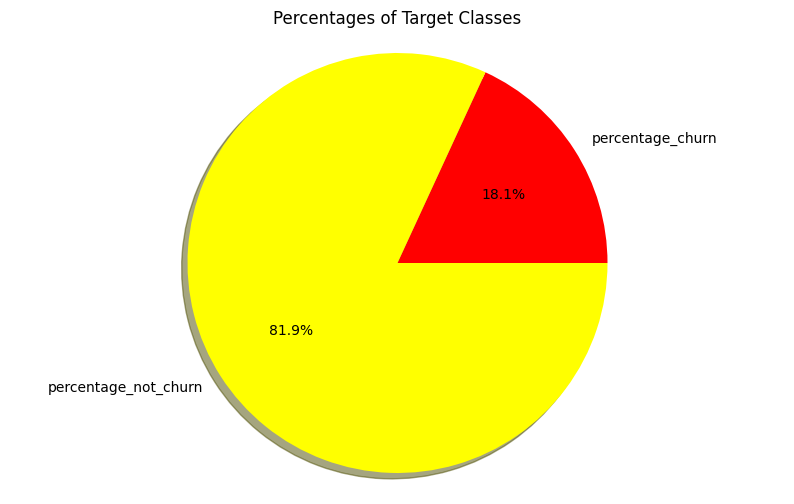

In [111]:
# PIE CHART
churn_count = (train_data['Churn'] == 1).sum()
not_churn_count = (train_data['Churn'] == 0).sum()

total_count = len(train_data)

percentage_churn = (churn_count / total_count) * 100
percentage_not_churn = (not_churn_count / total_count) * 100
print("*** After sampling ***")
print("Percentage of 'Churn':", percentage_churn)
print("Percentage of 'Not Churn':", percentage_not_churn)

# Pasta Grafiği Oluşturma
labels = ['percentage_churn', 'percentage_not_churn']
sizes = [percentage_churn, percentage_not_churn]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        colors=["red", "yellow"],
        shadow=True)
plt.axis('equal')
plt.title("Percentages of Target Classes")
plt.show()

In [112]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

resampled_data = pd.concat([X_train_resampled, pd.Series(y_train_resampled, name='Churn')], axis=1)

X_resampled = resampled_data.drop('Churn', axis=1)
y_resampled = resampled_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.25,
                                                    random_state=42)

*** After sampling ***
Percentage of 'Churn': 50.0
Percentage of 'Not Churn': 50.0


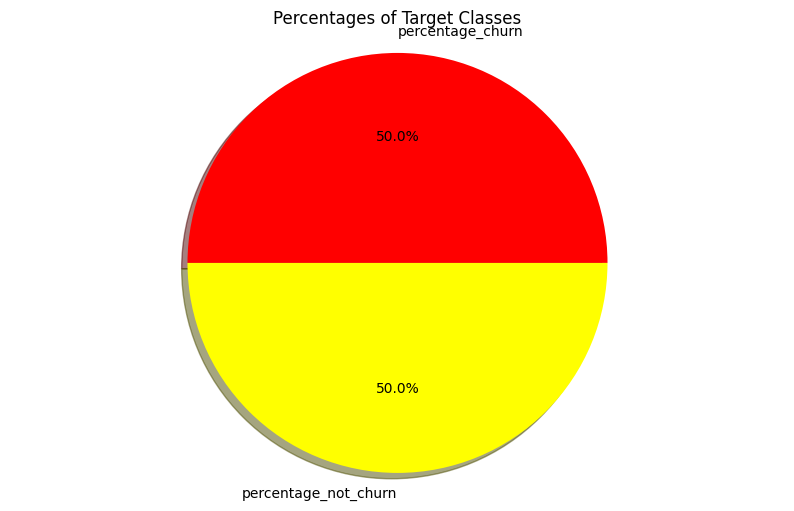

In [113]:
# PIE CHART
churn_count = (resampled_data['Churn'] == 1).sum()
not_churn_count = (resampled_data['Churn'] == 0).sum()

total_count = len(resampled_data)

percentage_churn = (churn_count / total_count) * 100
percentage_not_churn = (not_churn_count / total_count) * 100
print("*** After sampling ***")
print("Percentage of 'Churn':", percentage_churn)
print("Percentage of 'Not Churn':", percentage_not_churn)

# Pasta Grafiği Oluşturma
labels = ['percentage_churn', 'percentage_not_churn']
sizes = [percentage_churn, percentage_not_churn]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        colors=["red", "yellow"],
        shadow=True)
plt.axis('equal')
plt.title("Percentages of Target Classes")
plt.show()

# SMOTE Random Forests

In [114]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [115]:
# Test Set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
y_prob = model.predict_proba(X_test)[:, 1] # probability of class 1 occurs
print("Roc_AUC-->", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     37534
           1       0.84      0.87      0.85     37332

    accuracy                           0.85     74866
   macro avg       0.85      0.85      0.85     74866
weighted avg       0.85      0.85      0.85     74866

Roc_AUC--> 0.9316489336678329


The ROC AUC score is one of the most important metrics used to evaluate the performance of a model, especially for imbalanced datasets. The ROC curve evaluates the model by trying different classification threshold values. The AUC (Area Under the Curve) calculates the area under these curves (through integration), providing a single value. It examines the relationship between the "true positive rate" and the "true negative rate", ranging between 0 and 1. The closer the score is to 1, the better the performance of the model.

In [116]:
# Train Set
y_pred_train = model.predict(X_train)
print(classification_report(y_train, y_pred_train))
y_prob_train = model.predict_proba(X_train)[:, 1]
print("ROC_AUC-->", roc_auc_score(y_train, y_prob_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112198
           1       1.00      1.00      1.00    112400

    accuracy                           1.00    224598
   macro avg       1.00      1.00      1.00    224598
weighted avg       1.00      1.00      1.00    224598

ROC_AUC--> 1.0


# Model is in overfitting. We should fix it!

In [117]:
# Parameters
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Hyperparameter Optimization w RandomizedSearchCV

**In RandomForest models, hyperparameter optimization takes a considerable amount of time. For this reason, we initially perform hyperparameter tuning with RandomizedSearchCV. This method does not try all possibilities like GridSearchCV does, hence it runs faster but may not find the best results.**

In [118]:
params = {"max_depth": range(2, 15),  #  branching and depth of the tree
          "n_estimators": range(10, 50),  # number of created trees
          "min_samples_split": [2, 3, 4],  # minimum sample for splitting nodes
          "max_features": ["sqrt", "log", None,  "auto"],  # Maximum number of features to consider in each split
          "criterion": ["gini", "entropy"]}  # Splitting Criterions

rf_random = RandomizedSearchCV(estimator=model,  # ML Model
                               param_distributions=params,  # hiperparameters
                               n_iter=20,  # number of iterations (keep low for random forests model)
                               cv=3,  # cross validate value (keep low for random forests model)
                               random_state=42,
                               n_jobs=-1)  # CPU work with full performance
                              # verbose=2 to see transaction history and info.

rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 15),
                                        'max_features': ['sqrt', 'log', None,
                                                         'auto'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': range(10, 50)},
                   random_state=42)

In [119]:
print("Best Params-->", rf_random.best_params_)
print("Best Score-->", rf_random.best_score_)

Best Params--> {'n_estimators': 28, 'min_samples_split': 3, 'max_features': None, 'max_depth': 13, 'criterion': 'gini'}
Best Score--> 0.7935288827148951


# Model Tuned

In [120]:
model_tuned = model.set_params(**rf_random.best_params_).fit(X_train, y_train)

In [121]:
# Test Set
y_pred = model_tuned.predict(X_test)
print(classification_report(y_test, y_pred))
y_prob = model_tuned.predict_proba(X_test)[:, 1]  # probability of class 1 occurs
print("Roc_AUC-->", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     37534
           1       0.79      0.81      0.80     37332

    accuracy                           0.80     74866
   macro avg       0.80      0.80      0.80     74866
weighted avg       0.80      0.80      0.80     74866

Roc_AUC--> 0.8804593321441633


In [122]:
# Train Set
y_pred_train = model_tuned.predict(X_train)
print(classification_report(y_train, y_pred_train))
y_prob_train = model_tuned.predict_proba(X_train)[:, 1]
print("ROC_AUC-->", roc_auc_score(y_train, y_prob_train))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85    112198
           1       0.84      0.88      0.86    112400

    accuracy                           0.85    224598
   macro avg       0.85      0.85      0.85    224598
weighted avg       0.85      0.85      0.85    224598

ROC_AUC--> 0.9283808934164366


**We fixed the overfitting problem, but our f1 score and roc_auc scores decreased. Now we will focus onto the increase these metrics to increase the pefromance of model. Random Forest Models take long time for hyperparameter optimization and model fitting. So, we should keep in mind this situation while dealing in this area!**

# Hyperparameter Optimization w GridSearchCV

In [123]:
params_grid = {"max_depth": [15, 17],
              "n_estimators": [40, 50, 70]}

rf_grid = GridSearchCV(estimator=model,
                      param_grid=params_grid,
                      cv=2,
                      scoring="f1",
                      n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


In [124]:
print("Best Parameters-->", rf_grid.best_params_)
print("Best Scores-->", rf_grid.best_score_)

Best Parameters--> {'max_depth': 17, 'n_estimators': 70}
Best Scores--> 0.8211400387584078


In [125]:
model_tuned = model_tuned.set_params(**rf_grid.best_params_).fit(X_train, y_train)

In [126]:
# Test Set
y_pred = model_tuned.predict(X_test)
print(classification_report(y_test, y_pred))
y_prob = model_tuned.predict_proba(X_test)[:, 1]
print("roc_auc-->", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     37534
           1       0.84      0.84      0.84     37332

    accuracy                           0.84     74866
   macro avg       0.84      0.84      0.84     74866
weighted avg       0.84      0.84      0.84     74866

roc_auc--> 0.9194693486120497


In [127]:
# Train Set
y_pred_train = model_tuned.predict(X_train)
print(classification_report(y_train, y_pred_train))
y_prob_train = model_tuned.predict_proba(X_train)[:, 1]
print("roc_auc-->", roc_auc_score(y_train, y_prob_train))


              precision    recall  f1-score   support

           0       0.98      0.91      0.94    112198
           1       0.91      0.98      0.95    112400

    accuracy                           0.94    224598
   macro avg       0.95      0.94      0.94    224598
weighted avg       0.95      0.94      0.94    224598

roc_auc--> 0.9845202666704685


**The model may have overfitted and memorized the data. To get rid of this risk, we can reduce the max_depth parameter value a little more.**

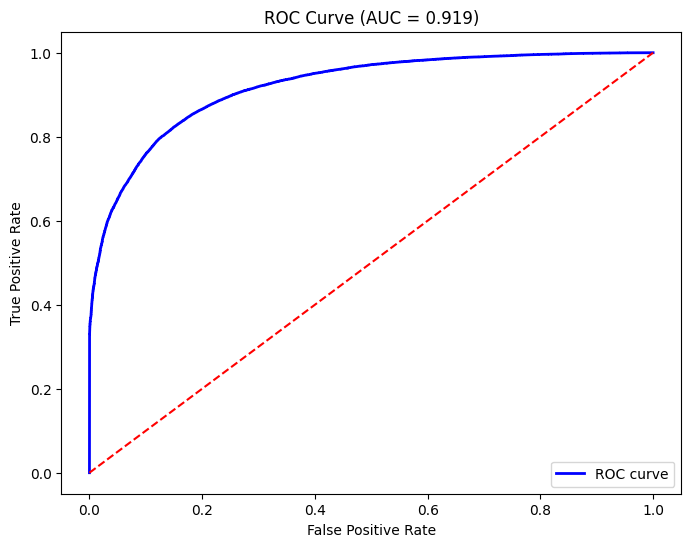

In [128]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {})'.format(round(roc_auc_score(y_test, y_prob), 3)))
plt.legend(loc='lower right')
plt.show()

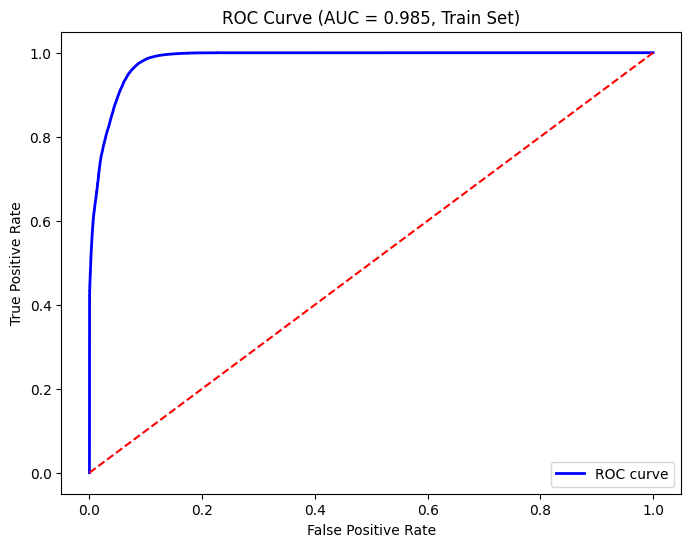

In [129]:
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {}, Train Set)'.format(round(roc_auc_score(y_train, y_prob_train), 3)))
plt.legend(loc='lower right')
plt.show()

In [130]:
# Test Set K-Fold Cross Validation
cv_results = cross_validate(model_tuned, 
                            X_test, y_test,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

print("Accuracy:", round(cv_results["test_accuracy"].mean(), 2))
print("Precision:", round(cv_results["test_precision"].mean(), 2))
print("Recall:", round(cv_results["test_recall"].mean(), 2))
print("f1:", round(cv_results["test_f1"].mean(), 2))
print("roc_auc:", round(cv_results["test_roc_auc"].mean(), 2))

Accuracy: 0.8
Precision: 0.79
Recall: 0.81
f1: 0.8
roc_auc: 0.88


In [131]:
# Train Set K-Fold Cross Validation
cv_results = cross_validate(model_tuned, 
                            X_train, y_train,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

print("Accuracy:", round(cv_results["test_accuracy"].mean(), 2))
print("Precision:", round(cv_results["test_precision"].mean(), 2))
print("Recall:", round(cv_results["test_recall"].mean(), 2))
print("f1:", round(cv_results["test_f1"].mean(), 2))
print("roc_auc:", round(cv_results["test_roc_auc"].mean(), 2))

Accuracy: 0.83
Precision: 0.83
Recall: 0.83
f1: 0.83
roc_auc: 0.92


In [132]:
# Prediction:
random_customer = X_train.sample(1)
random_customer

AccountAge  MonthlyCharges  TotalCharges  SubscriptionType  \
175076    0.491906       -1.550097     -0.584348                 2   

        PaymentMethod  PaperlessBilling  ContentType  MultiDeviceAccess  \
175076              0                 0            2                  0   

        DeviceRegistered  ViewingHoursPerWeek  AverageViewingDuration  \
175076                 1            -1.591292               -0.273935   

        ContentDownloadsPerMonth  GenrePreference  UserRating  \
175076                  1.630863                0    0.249812   

        SupportTicketsPerMonth  Gender  WatchlistSize  ParentalControl  \
175076                0.520065       1       0.274553                0   

        SubtitlesEnabled  
175076                 1

In [133]:
y_train[X_train.index == random_customer.index[0]]

175076    0
Name: Churn, dtype: int64

In [134]:
print("Prediction Outcome for Random Customer:\t", model_tuned.predict(random_customer))

Prediction Outcome for Random Customer:	 [0]


Train Score Mean--> [0.62853787 0.67936761 0.71349591 0.73119188 0.75147293 0.7729357
 0.7963504  0.82033729 0.84599659]
Test Score Mean--> [0.62783112 0.67842652 0.71174738 0.72826393 0.74668859 0.76573048
 0.7855915  0.80438858 0.82219652]


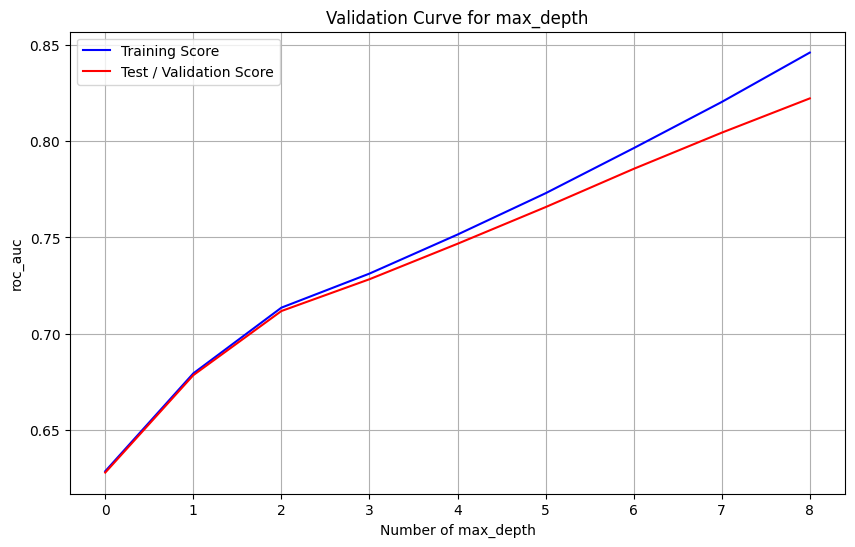

In [135]:
#Analyzing model complexity with Learning Curves
from sklearn.model_selection import validation_curve

train_score, test_score = validation_curve(model_tuned,
                                           X_train, y_train,
                                           cv=2,
                                           param_name="max_depth",
                                           param_range=range(1, 10),
                                           scoring="roc_auc")

mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)
print("Train Score Mean-->", mean_train_score)
print("Test Score Mean-->", mean_test_score)

plt.plot(mean_train_score,
         label="Training Score", color="blue")

plt.plot(mean_test_score,
         label="Test / Validation Score", color="red")

plt.title("Validation Curve for max_depth")
plt.xlabel("Number of max_depth")
plt.ylabel("roc_auc")
plt.grid()
plt.legend(loc="best")
plt.show()


# SMOTE DecisionTree

In [136]:
class_weights = {0: 1, 1: 3}  # Penalty Coefficients
cart_model = DecisionTreeClassifier(random_state=45, class_weight=class_weights).fit(X_train, y_train)

In [137]:
# Test Set
y_pred = cart_model.predict(X_test)
print(classification_report(y_test, y_pred))
y_prob = cart_model.predict_proba(X_test)[:, 1]
print("roc_auc-->", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     37534
           1       0.78      0.78      0.78     37332

    accuracy                           0.78     74866
   macro avg       0.78      0.78      0.78     74866
weighted avg       0.78      0.78      0.78     74866

roc_auc--> 0.7782233953947685


In [138]:
# Train Set
y_pred_train = cart_model.predict(X_train)
print(classification_report(y_train, y_pred_train))
y_prob_train = cart_model.predict_proba(X_train)[:, 1]
print("roc_auc-->", roc_auc_score(y_train, y_prob_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112198
           1       1.00      1.00      1.00    112400

    accuracy                           1.00    224598
   macro avg       1.00      1.00      1.00    224598
weighted avg       1.00      1.00      1.00    224598

roc_auc--> 1.0


# Model is in Overfitting!

In [139]:
print(cart_model.get_params())

{'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 45, 'splitter': 'best'}


# Hyperparameter Optimization w RandomizedSearchCV

In [140]:
params = {"criterion": ["gini", "entropy"],
          "max_depth": range(2, 30),
          "splitter": ["best", "random"],
          "min_samples_split": range(2, 10),
          "min_samples_leaf": range(1, 5),
          "max_features": ["auto", "sqrt", "log2", 3, 5, 7]}

cart_random = RandomizedSearchCV(estimator=cart_model,
                               param_distributions=params,
                               cv=3,
                               random_state=42,
                               n_iter=100, n_jobs=-1)
cart_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 3},
                                                    random_state=45),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 30),
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         3, 5, 7],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(2, 10),
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [141]:
print("Best Parameters-->", cart_random.best_params_)
print("Best Score-->", cart_random.best_score_)

Best Parameters--> {'splitter': 'best', 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 23, 'criterion': 'gini'}
Best Score--> 0.7207588669534012


In [142]:
# MODEL TUNED
cart_tuned_model = cart_model.set_params(**cart_random.best_params_).fit(X_train, y_train)

In [143]:
# Test Set
y_pred = cart_tuned_model.predict(X_test)
print(classification_report(y_test, y_pred))
y_prob = cart_tuned_model.predict_proba(X_test)[:, 1]
print("roc_auc-->", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.79      0.64      0.71     37534
           1       0.69      0.83      0.76     37332

    accuracy                           0.73     74866
   macro avg       0.74      0.73      0.73     74866
weighted avg       0.74      0.73      0.73     74866

roc_auc--> 0.7656770390531479


In [144]:
# Train Set
y_pred_train = cart_tuned_model.predict(X_train)
print(classification_report(y_train, y_pred_train))
y_prob_train = cart_tuned_model.predict_proba(X_train)[:, 1]
print("roc_auc-->", roc_auc_score(y_train, y_prob_train))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89    112198
           1       0.84      0.99      0.91    112400

    accuracy                           0.90    224598
   macro avg       0.91      0.90      0.90    224598
weighted avg       0.91      0.90      0.90    224598

roc_auc--> 0.9672256475810208


In [145]:
# Prediction:
random_customer = X_train.sample(1)
random_customer

AccountAge  MonthlyCharges  TotalCharges  SubscriptionType  \
6937    0.462743       -1.556414      -0.59939                 2   

      PaymentMethod  PaperlessBilling  ContentType  MultiDeviceAccess  \
6937              0                 0            2                  1   

      DeviceRegistered  ViewingHoursPerWeek  AverageViewingDuration  \
6937                 1             1.731056               -1.306989   

      ContentDownloadsPerMonth  GenrePreference  UserRating  \
6937                  1.283869                0   -0.254804   

      SupportTicketsPerMonth  Gender  WatchlistSize  ParentalControl  \
6937                1.215513       1       1.387806                0   

      SubtitlesEnabled  
6937                 1

In [146]:
y_train[X_train.index == random_customer.index[0]]

6937    0
Name: Churn, dtype: int64

In [147]:
print("Prediction Outcome for Random Customer:\t", cart_tuned_model.predict(random_customer))

Prediction Outcome for Random Customer:	 [0]


Train Score Mean--> [0.61549552 0.6616386  0.68582488 0.69854448 0.71830255 0.72901694
 0.74464936 0.75630022 0.77577059]
Test Score Mean--> [0.61529582 0.66082088 0.68427887 0.69577124 0.71459182 0.7234757
 0.73735815 0.74297045 0.75679889]


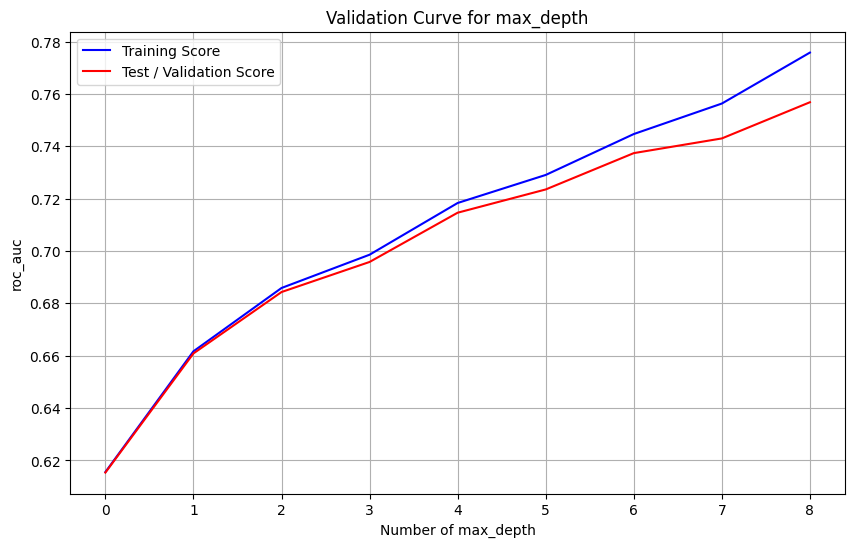

In [148]:
#Analyzing model complexity with Learning Curves
from sklearn.model_selection import validation_curve

train_score, test_score = validation_curve(cart_tuned_model,
                                           X_train, y_train,
                                           cv=2,
                                           param_name="max_depth",
                                           param_range=range(1, 10),
                                           scoring="roc_auc")

mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)
print("Train Score Mean-->", mean_train_score)
print("Test Score Mean-->", mean_test_score)

plt.plot(mean_train_score,
         label="Training Score", color="blue")

plt.plot(mean_test_score,
         label="Test / Validation Score", color="red")

plt.title("Validation Curve for max_depth")
plt.xlabel("Number of max_depth")
plt.ylabel("roc_auc")
plt.grid()
plt.legend(loc="best")
plt.show()

# SMOTE LightGBM

In [149]:
smote_lgbm = LGBMClassifier(random_state=42, verbosity=-1)
smote_lgbm.fit(X_train, y_train)

LGBMClassifier(random_state=42, verbosity=-1)

In [150]:
# Test Set
y_pred = smote_lgbm.predict(X_test)
y_prob = smote_lgbm.predict_proba(X_test)[:, 1]
print("Classification Report\n", classification_report(y_test, y_pred))
print("roc_auc-->", roc_auc_score(y_test, y_prob))

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     37534
           1       0.95      0.80      0.87     37332

    accuracy                           0.88     74866
   macro avg       0.89      0.88      0.88     74866
weighted avg       0.89      0.88      0.88     74866

roc_auc--> 0.9400852445302623


In [151]:
# Train Set
y_pred_train = smote_lgbm.predict(X_train)
y_prob_train = smote_lgbm.predict_proba(X_train)[:, 1]
print("Classification Report\n", classification_report(y_train, y_pred_train))
print("roc_auc-->", roc_auc_score(y_train, y_prob_train))

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.97      0.89    112198
           1       0.96      0.80      0.87    112400

    accuracy                           0.88    224598
   macro avg       0.89      0.88      0.88    224598
weighted avg       0.89      0.88      0.88    224598

roc_auc--> 0.942887681674726


# Hyperparameter Optimization

In [152]:
smote_lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'verbosity': -1}

In [153]:
params = {"max_depth": range(-1, 5),
          "n_estimators": [100, 200, 300],
          "subsample": [0.6, 0.8, 1.0]}

smote_lgbm_cv = GridSearchCV(estimator=smote_lgbm,  # Model
                            param_grid=params,      # Parameters
                            cv=3,                   # Cross Validate Value
                            scoring="f1",           # Validation Score 
                            n_jobs=-1).fit(X_train, y_train) 


In [154]:
print("Best Params-->", smote_lgbm_cv.best_params_)
print("Best Score-->", smote_lgbm_cv.best_score_)

Best Params--> {'max_depth': -1, 'n_estimators': 300, 'subsample': 0.6}
Best Score--> 0.877622557471053


In [155]:
model_tuned = smote_lgbm.set_params(**smote_lgbm_cv.best_params_).fit(X_train, y_train)

In [156]:
# Test Set
y_pred = model_tuned.predict(X_test)
y_prob = model_tuned.predict_proba(X_test)[:, 1]
print("Classification Report\n", classification_report(y_test, y_pred))
print("roc_auc-->", roc_auc_score(y_test, y_prob))

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     37534
           1       0.96      0.81      0.88     37332

    accuracy                           0.89     74866
   macro avg       0.90      0.89      0.89     74866
weighted avg       0.90      0.89      0.89     74866

roc_auc--> 0.9430190408569369


In [157]:
# Train Set
y_pred_train = model_tuned.predict(X_train)
y_prob_train = model_tuned.predict_proba(X_train)[:, 1]
print("Classification Report\n", classification_report(y_train, y_pred_train))
print("roc_auc-->", roc_auc_score(y_train, y_prob_train))

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.98      0.90    112198
           1       0.97      0.81      0.89    112400

    accuracy                           0.90    224598
   macro avg       0.91      0.90      0.89    224598
weighted avg       0.91      0.90      0.89    224598

roc_auc--> 0.9542098535894126


In [158]:
# Prediction:
random_customer = X_train.sample(1)
random_customer

AccountAge  MonthlyCharges  TotalCharges  SubscriptionType  \
41992   -1.112041        0.484182     -0.823424                 2   

       PaymentMethod  PaperlessBilling  ContentType  MultiDeviceAccess  \
41992              3                 0            2                  0   

       DeviceRegistered  ViewingHoursPerWeek  AverageViewingDuration  \
41992                 3             0.726456                -0.27663   

       ContentDownloadsPerMonth  GenrePreference  UserRating  \
41992                  0.034687                0    -0.36387   

       SupportTicketsPerMonth  Gender  WatchlistSize  ParentalControl  \
41992               -1.218556       1        1.66612                0   

       SubtitlesEnabled  
41992                 1

In [159]:
y_train[X_train.index == random_customer.index[0]]

41992    0
Name: Churn, dtype: int64

In [160]:
print("Prediction Outcome for Random Customer:\t", model_tuned.predict(random_customer))

Prediction Outcome for Random Customer:	 [0]


Train Score Mean--> [0.82143603 0.91892574 0.93447007 0.94671441 0.95429388 0.95989394
 0.96068459 0.96114316 0.9614765 ]
Test Score Mean--> [0.81974641 0.91642893 0.93033589 0.93960809 0.94065566 0.94105741
 0.94117523 0.94126491 0.94147735]


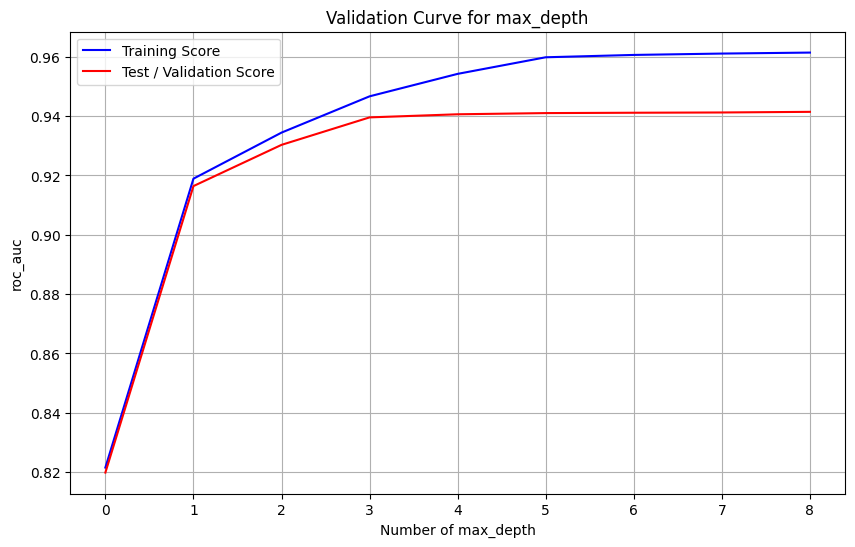

In [161]:
#Analyzing model complexity with Learning Curves
from sklearn.model_selection import validation_curve

train_score, test_score = validation_curve(model_tuned,
                                           X_train, y_train,
                                           cv=2,
                                           param_name="max_depth",
                                           param_range=range(1, 10),
                                           scoring="roc_auc")

mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)
print("Train Score Mean-->", mean_train_score)
print("Test Score Mean-->", mean_test_score)

plt.plot(mean_train_score,
         label="Training Score", color="blue")

plt.plot(mean_test_score,
         label="Test / Validation Score", color="red")

plt.title("Validation Curve for max_depth")
plt.xlabel("Number of max_depth")
plt.ylabel("roc_auc")
plt.grid()
plt.legend(loc="best")
plt.show()